In [1]:
from nico import Annotations as sann
from nico import Interactions as sint
from nico import Covariations as scov

#import Annotations as sann
#import Interactions as sint
#import Covariations as scov

import scanpy as sc
#import gseapy
#import xlsxwriter

import numpy as np
import time
import os

import matplotlib


In [2]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['axes.linewidth'] = 0.1 #set the value globally

import matplotlib.pyplot as plt
plt.rc('font', family='Helvetica')

In [3]:
print("Help me with the parameters of the function")

#print(sann.find_anchor_cells_between_ref_and_query.__doc__)
#print(sint.spatial_neighborhood_analysis.__doc__)
#print(scov.gene_covariation_analysis.__doc__)


Help me with the parameters of the function


# Perform Annotations 

In [4]:
output_info=sann.find_anchor_cells_between_ref_and_query(guided_spatial_cluster_resolution_tag='leiden0.4',across_spatial_clusters_dispersion_cutoff=0.15,
resolved_tie_issue_with_weighted_nearest_neighbor='No')

In [5]:
#output_info

In [5]:
output_info=sann.find_anchor_cells_between_ref_and_query(guided_spatial_cluster_resolution_tag='leiden0.4',across_spatial_clusters_dispersion_cutoff=0.15,
resolved_tie_issue_with_weighted_nearest_neighbor='No')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


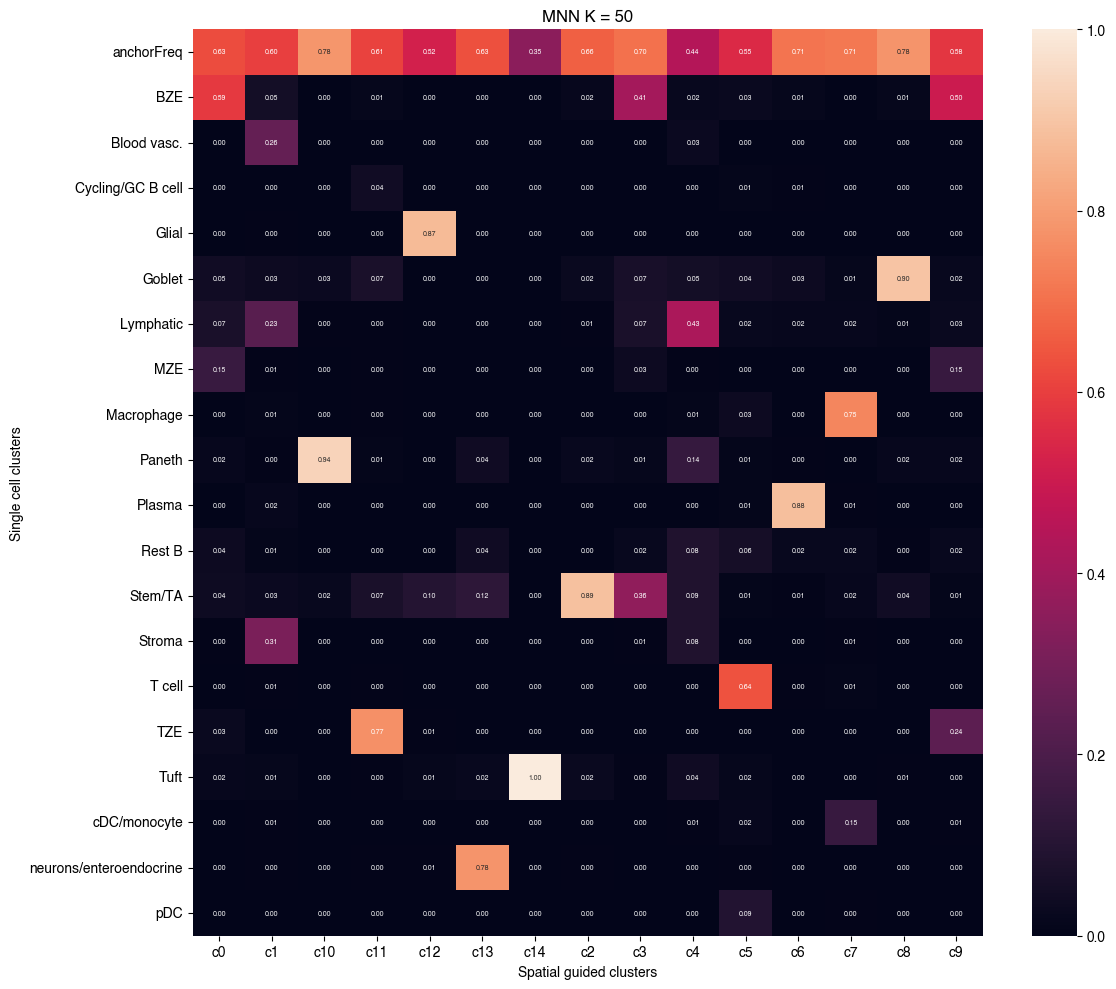

In [6]:
sann.visualize_spatial_anchored_cell_mapped_to_scRNAseq(output_info)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


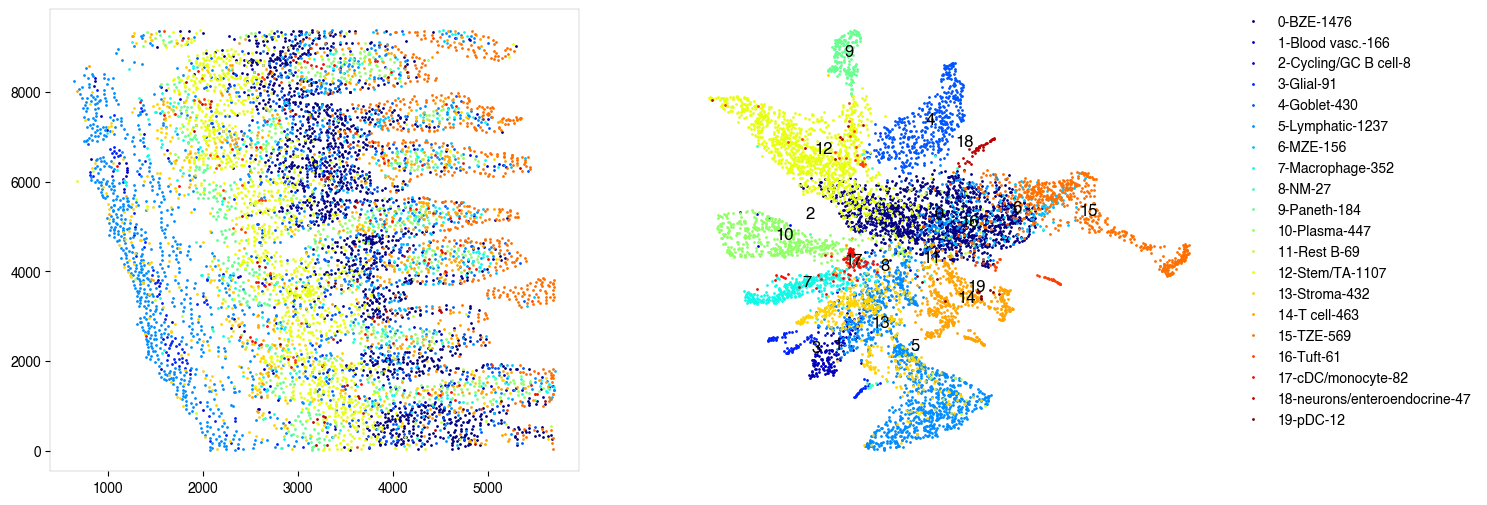

In [7]:
sann.visualize_umap_and_cell_coordinates_with_all_celltypes()

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know

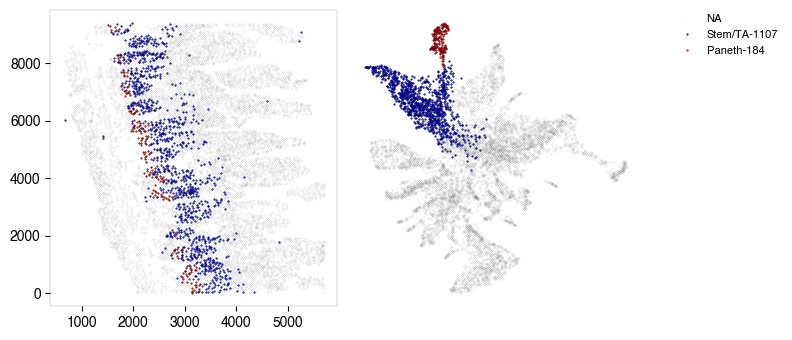

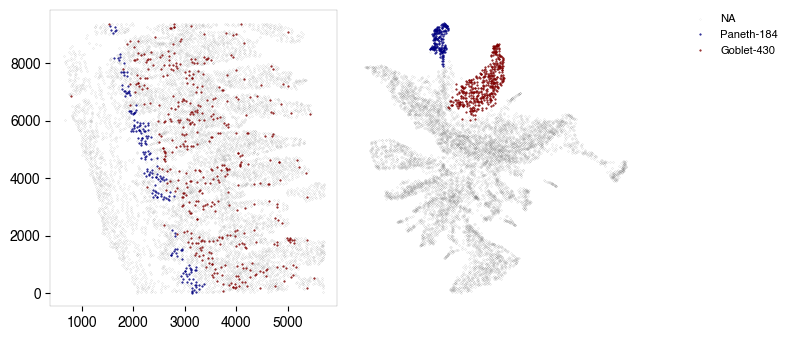

In [8]:
choose_celltypes=[['Stem/TA','Paneth'],['Paneth','Goblet']]

sann.visualize_umap_and_cell_coordinates_with_selected_celltypes(choose_celltypes=choose_celltypes)



In [9]:
#Plot all the cell types individually. 
#sann.visualize_umap_and_cell_coordinates_with_selected_celltypes(choose_celltypes=[])

# Predict niche interactions 

In [10]:
niche_pred_output=sint.spatial_neighborhood_analysis(Radius=0,removed_CTs_before_finding_CT_CT_interactions=['NM','Basophils','Cycling/GC B cell','pDC'])


average neighbors: 4.850590310761297
data shape (7340, 19) (7340,) neighbor shape (7340, 17)
Searching hyperparameters  Grid method: 0.0009765625
Searching hyperparameters  Grid method: 0.001953125
Searching hyperparameters  Grid method: 0.001953125
Inverse of lambda regularization found 0.001953125
training (5872, 17) testing (1468, 17) coeff (17, 17)


The figures are saved in  ./spatial_ct_ct_interactions/niche_prediction_linear/TopCoeff_R0


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


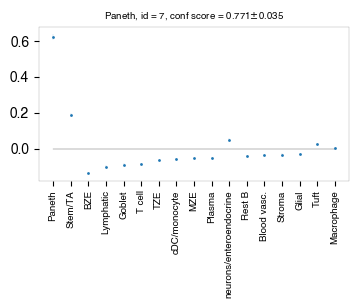

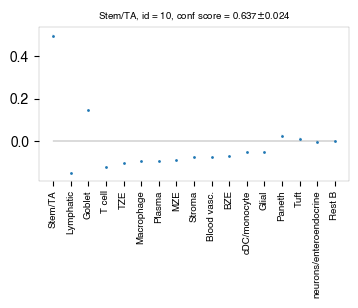

In [11]:
sint.find_interacting_cell_types(niche_pred_output,choose_celltypes=['Stem/TA','Paneth'])

In [12]:
#create for all the cell types 
#sint.find_interacting_cell_types(niche_pred_output,choose_celltypes=[])

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


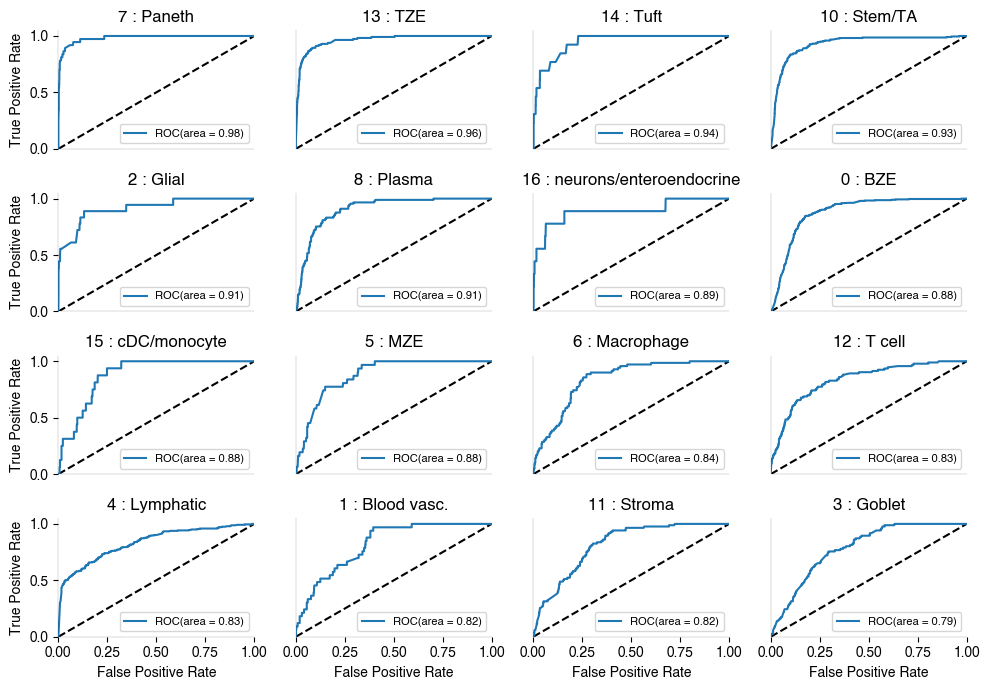

In [13]:
sint.plot_roc_results(niche_pred_output)


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


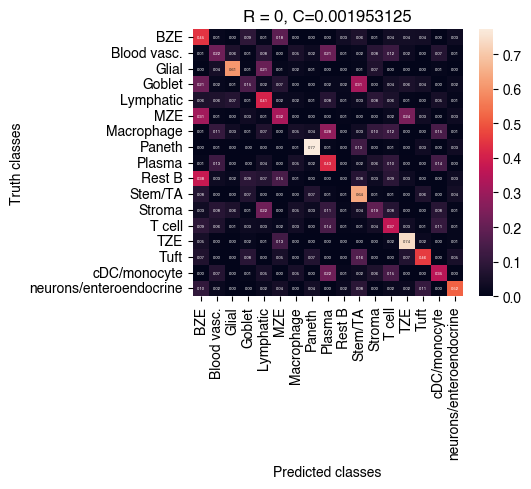

In [14]:
sint.plot_confusion_matrix(niche_pred_output)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


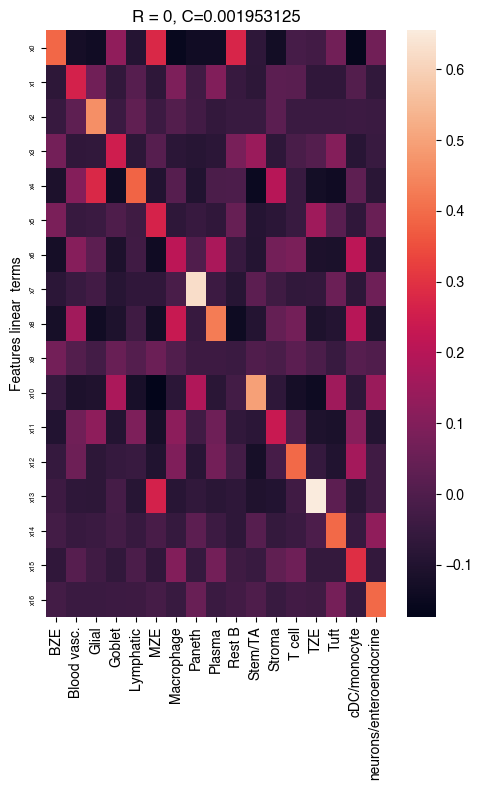

In [15]:
sint.plot_coefficient_matrix(niche_pred_output)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


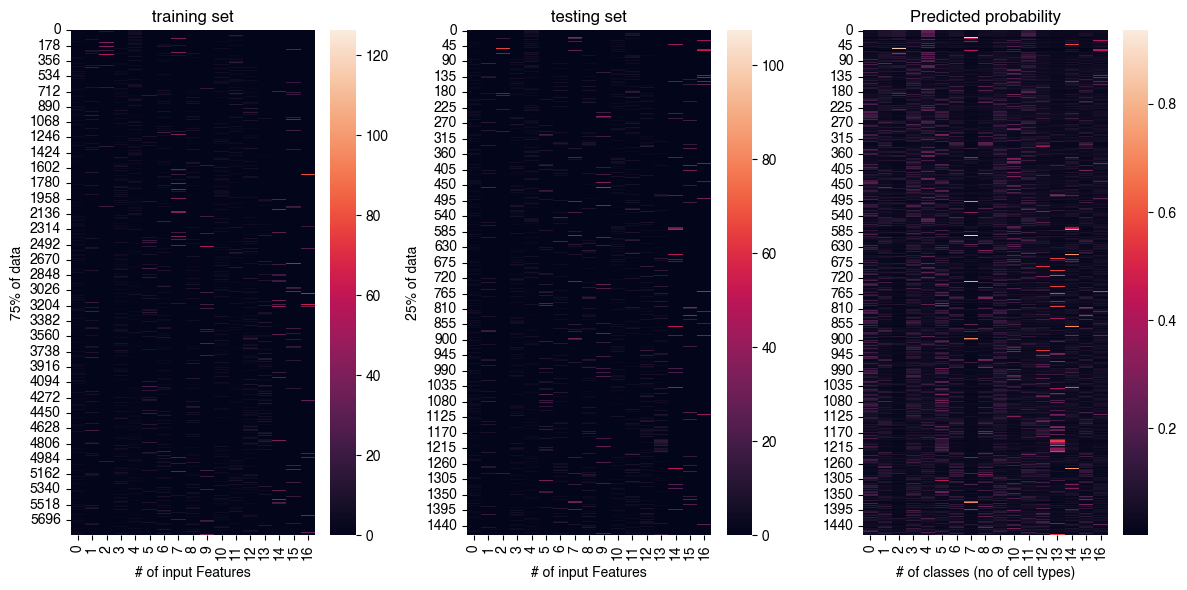

In [16]:
sint.plot_predicted_probabilities(niche_pred_output)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


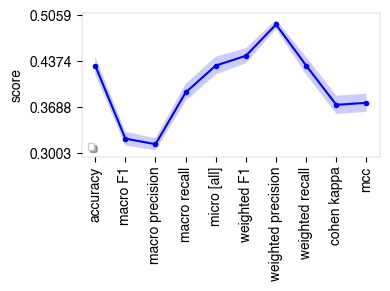

In [17]:
sint.plot_evaluation_scores(niche_pred_output, figsize=(4,3))

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


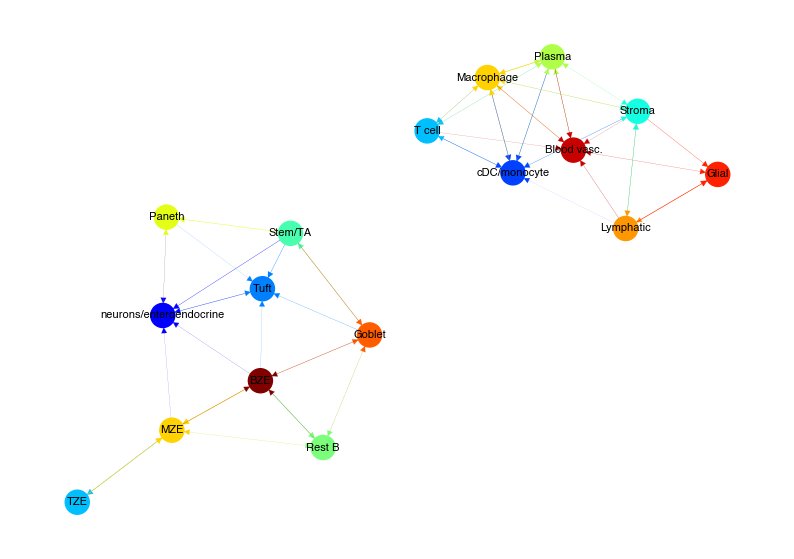

In [18]:
sint.plot_niche_interactions_without_edge_weight(niche_pred_output,niche_cutoff=0.04)


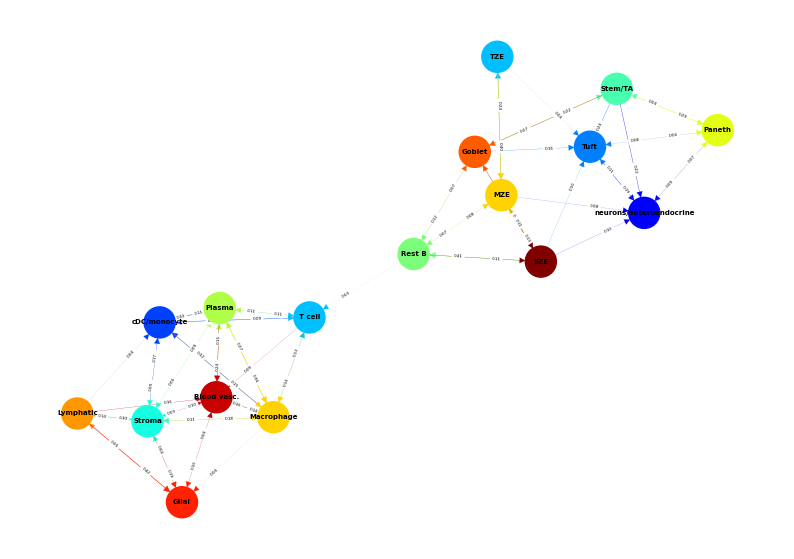

In [19]:
sint.plot_niche_interactions_with_edge_weight(niche_pred_output,niche_cutoff=0.03)


# Perform covariational analysis

In [20]:
all_output_data=scov.gene_covariation_analysis(iNMFmode=True,Radius=0,no_of_factors=3)



 Spatial and scRNA-seq number of clusters, respectively  17 19
Common cell types between spatial and scRNA-seq data   17 {'Glial', 'Plasma', 'MZE', 'TZE', 'Stem/TA', 'Blood vasc.', 'Stroma', 'cDC/monocyte', 'Lymphatic', 'Macrophage', 'Goblet', 'Paneth', 'neurons/enteroendocrine', 'Tuft', 'BZE', 'Rest B', 'T cell'}

The spatial cluster name does not match the scRNA-seq cluster name  set()
If the above answer is Null, then everything is okay. However, If any spatial cell type does not exist in scRNA-seq data, please correct this manually; otherwise, NiCo will not run. 





Cosine and spearman correlation: visualize the correlation of genes from NMF
cell types found  ['Paneth']
These figures are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/NMF_output/


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


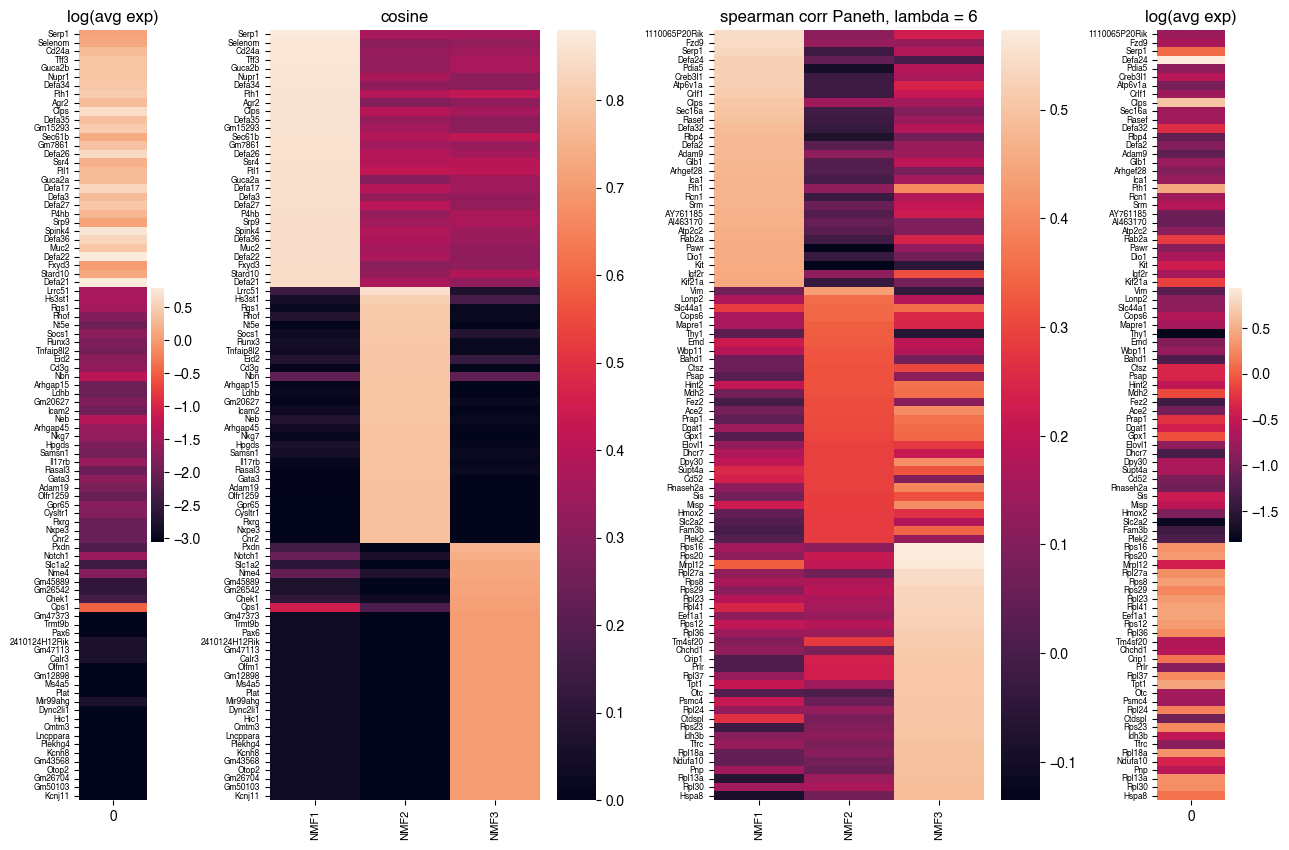

In [21]:
print("Cosine and spearman correlation: visualize the correlation of genes from NMF")
scov.plot_cosine_and_spearman_correlation_to_factors(all_output_data,choose_celltypes=['Paneth'],NOG_Fa=30)

1 extra bytes in post.stringData array


plot ridge regression covariations
cell types found  ['Paneth', 'Stem/TA']
The regression figures are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3//Regression_outputs/


'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


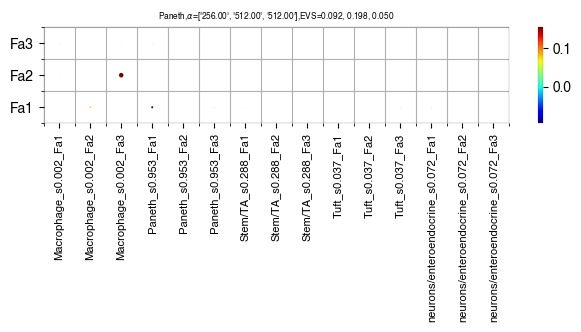

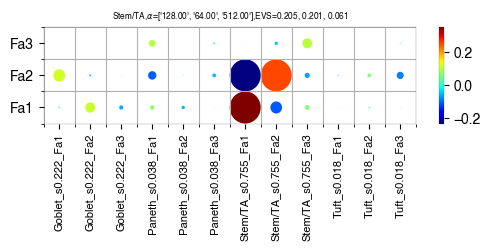

In [22]:
choose_celltypes=['Stem/TA','Paneth']

print("plot ridge regression covariations")
scov.plot_signifant_regression_covariations(all_output_data,choose_celltypes=choose_celltypes)


Perform ligand receptors analysis Stem/TA niche
LR figures for both ways are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3//Plot_ligand_receptor_in_niche/
LR figures for CC to NC are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3//Plot_ligand_receptor_in_niche_cc_vs_nc/
LR figures for NC to CC are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3//Plot_ligand_receptor_in_niche_nc_vs_cc/
cell types found  ['Stem/TA']


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know

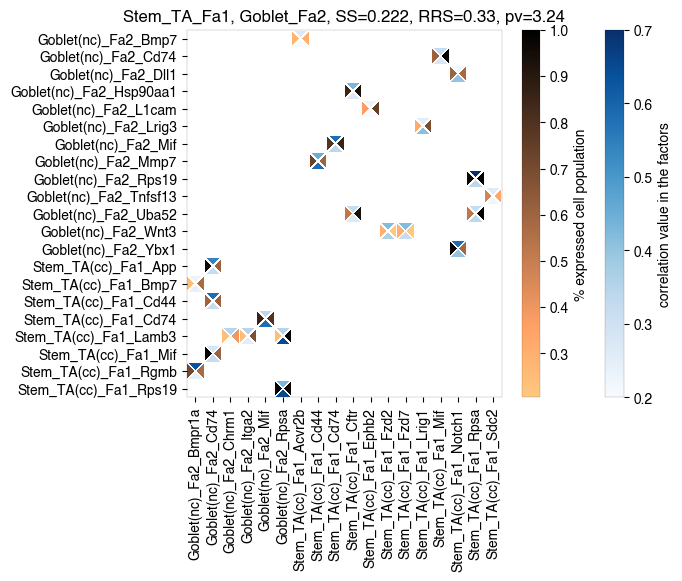

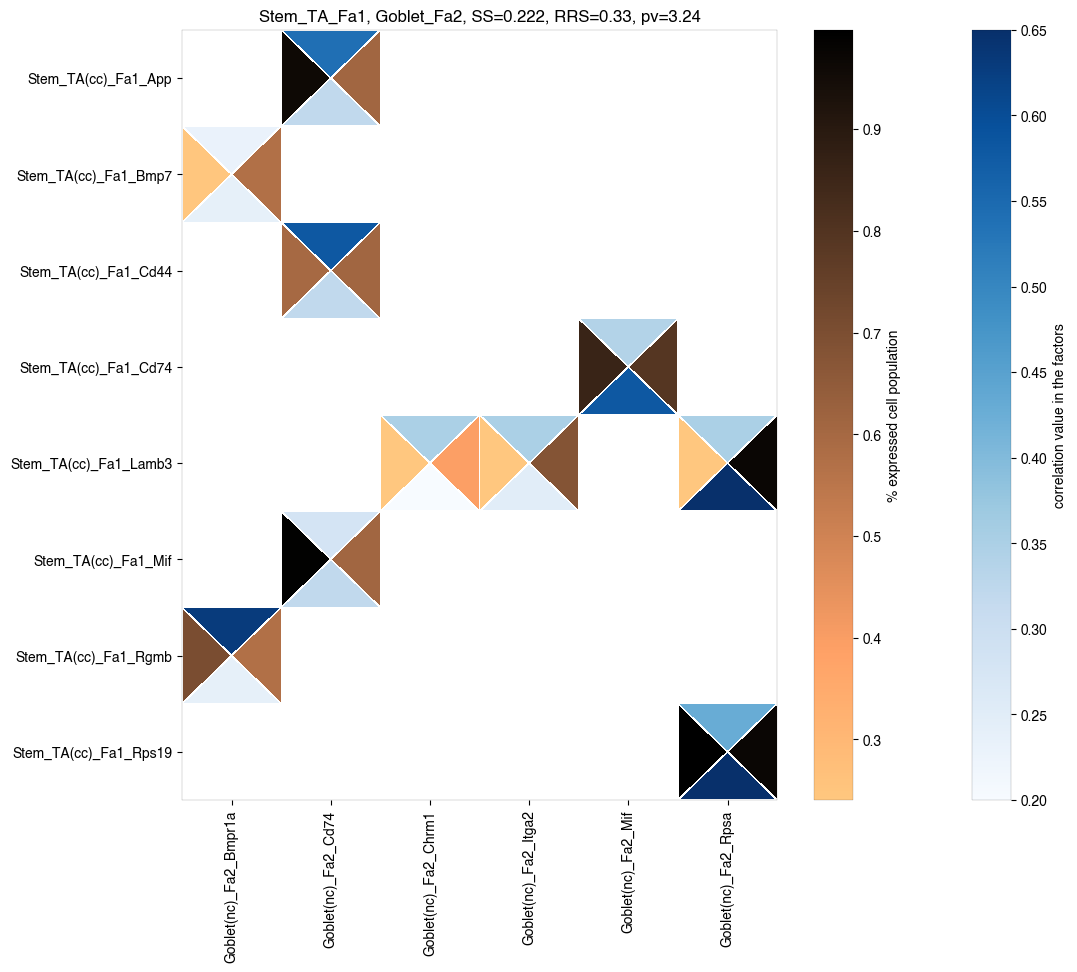

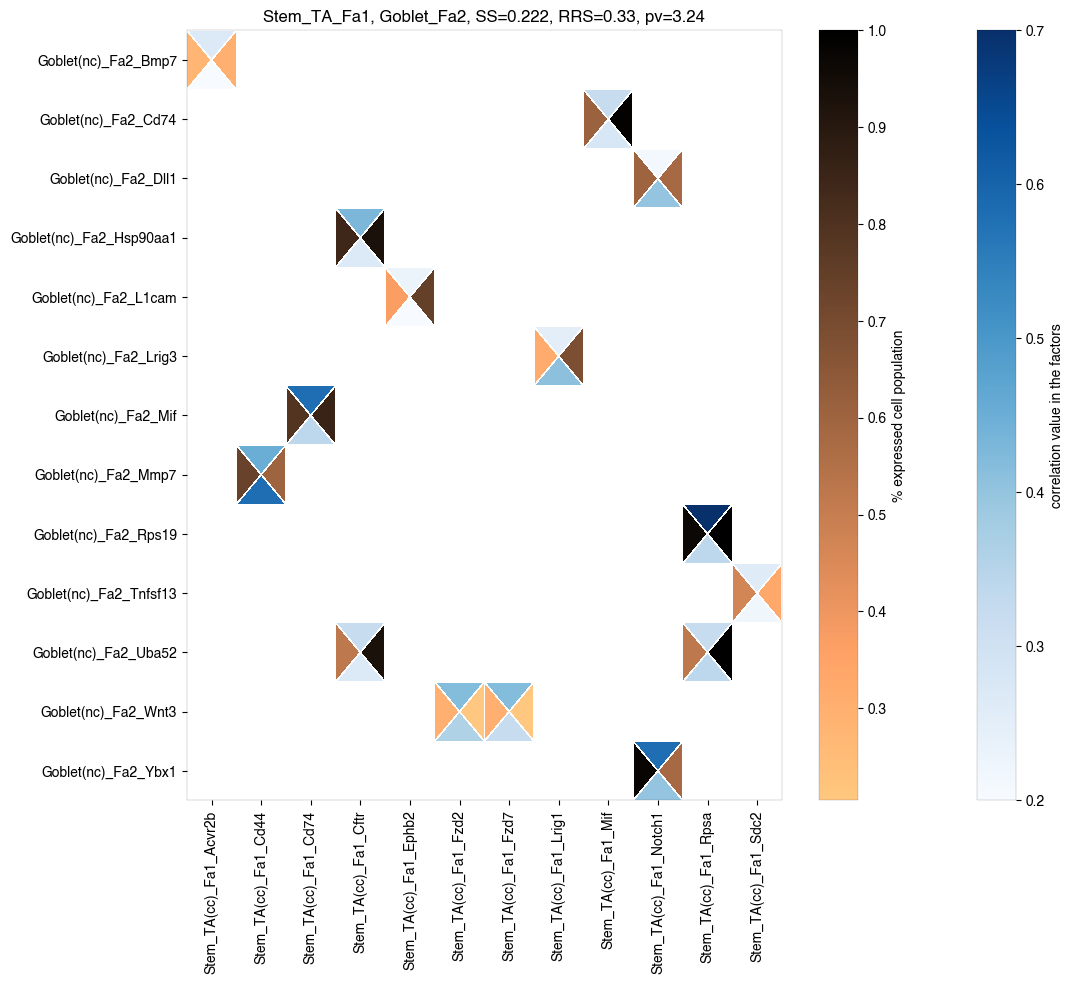

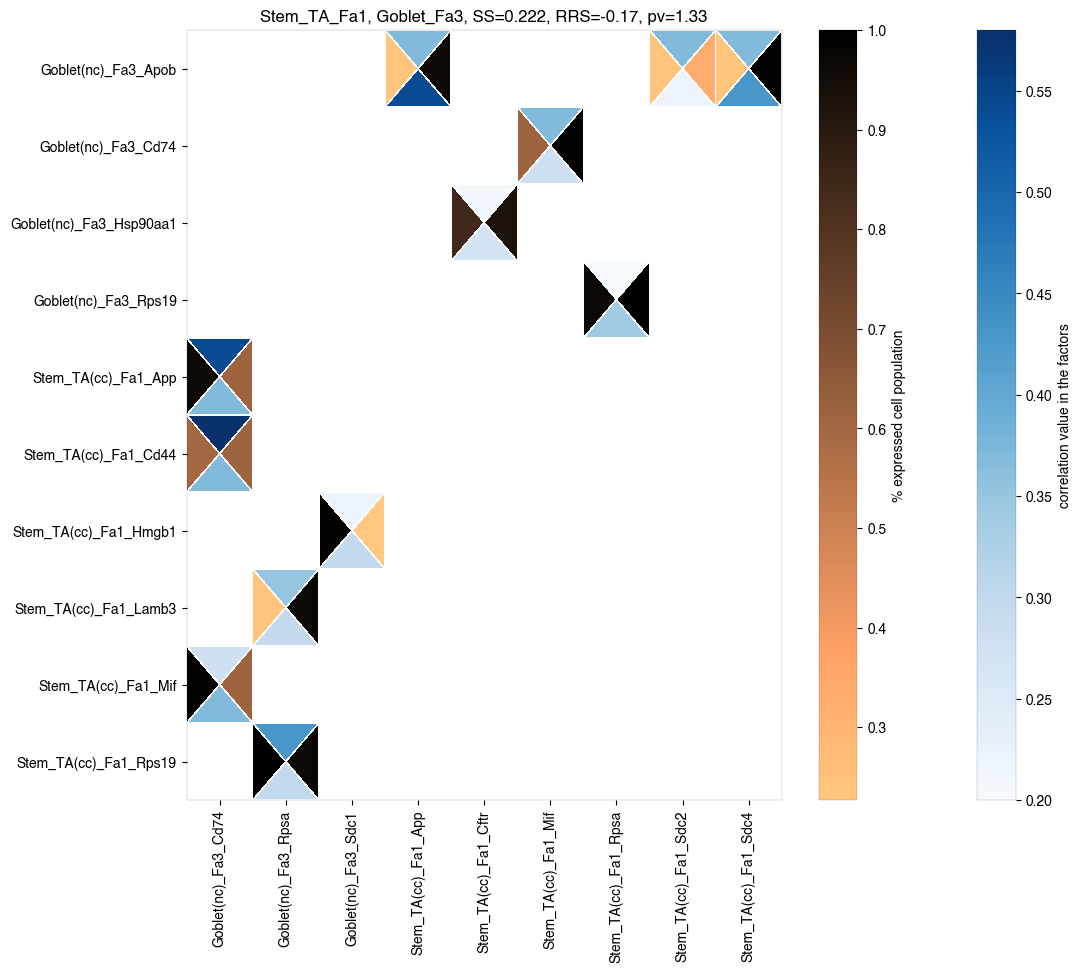

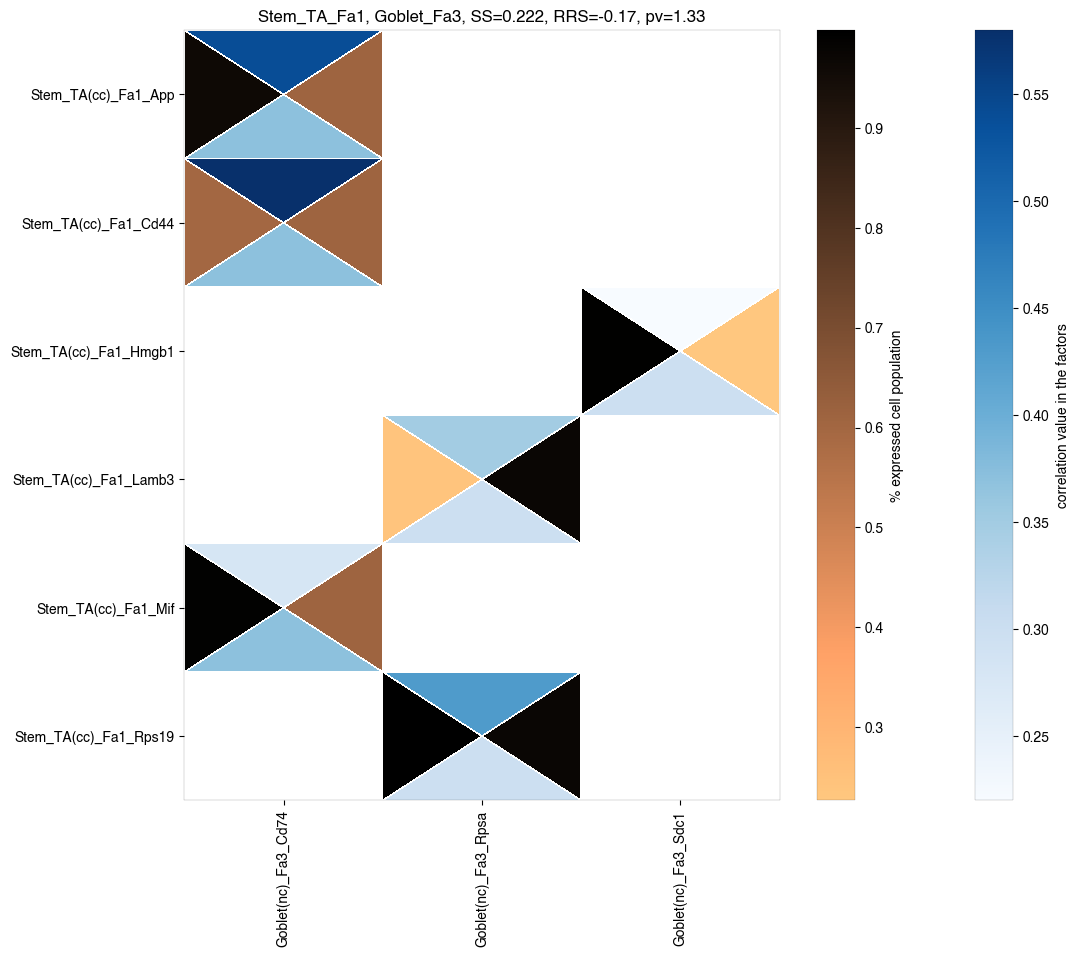

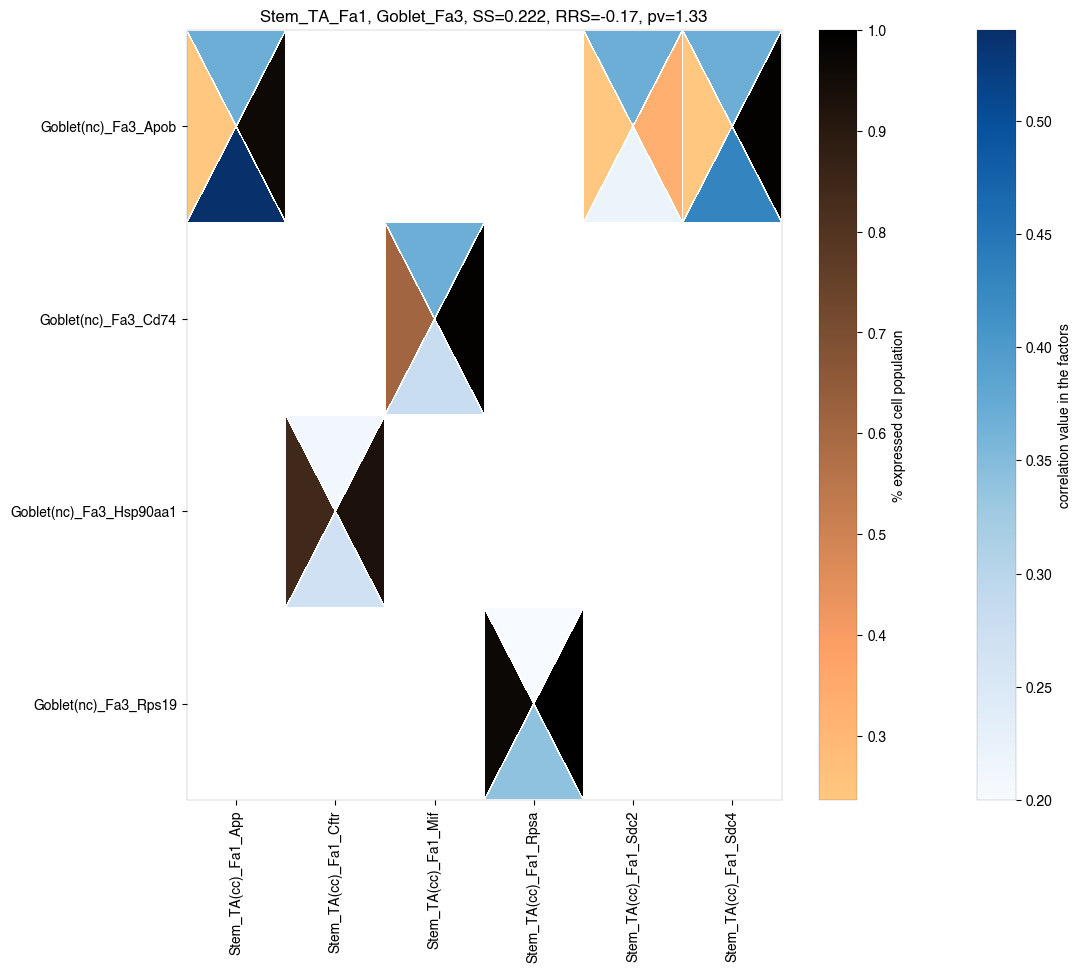

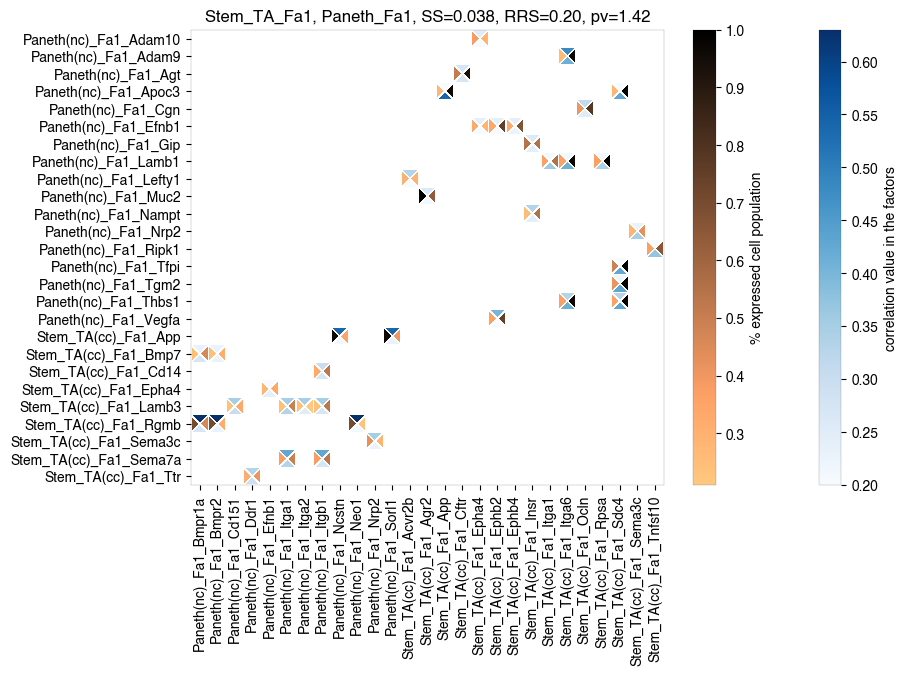

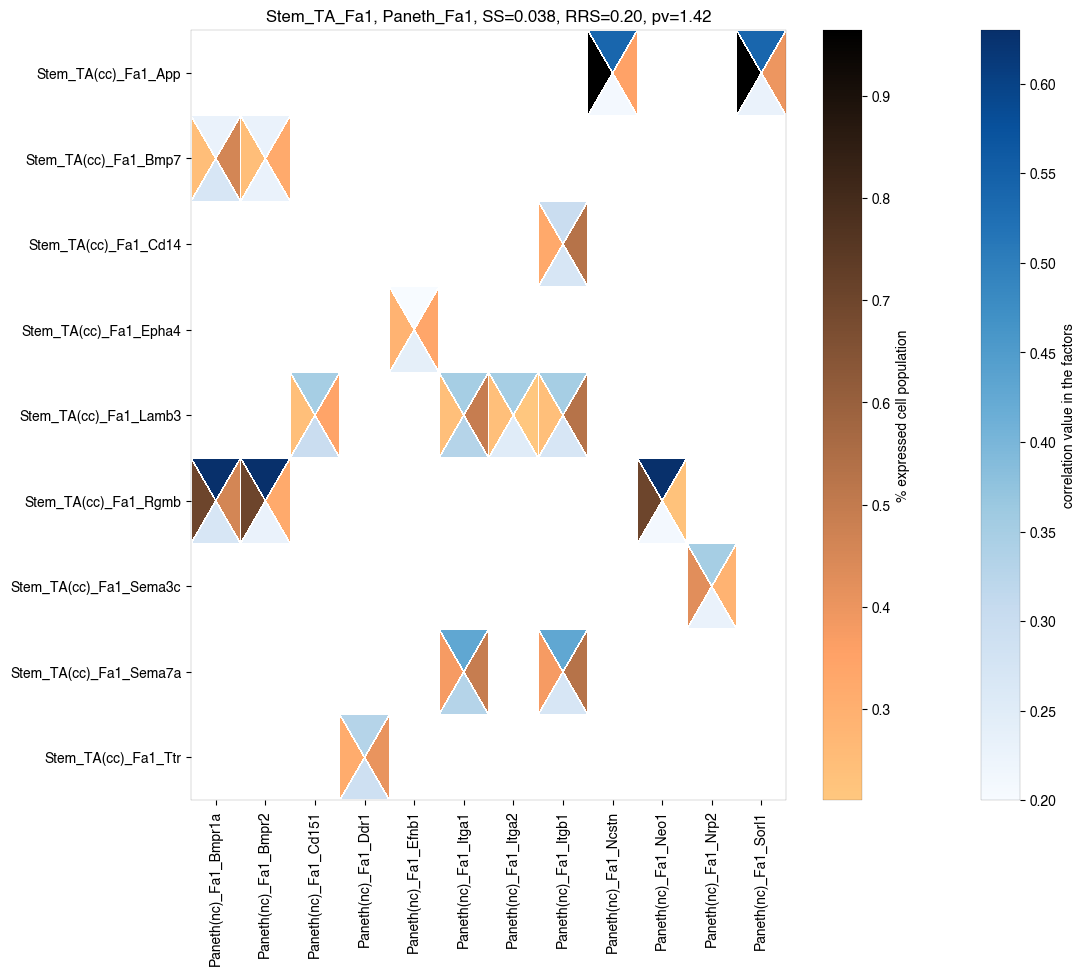

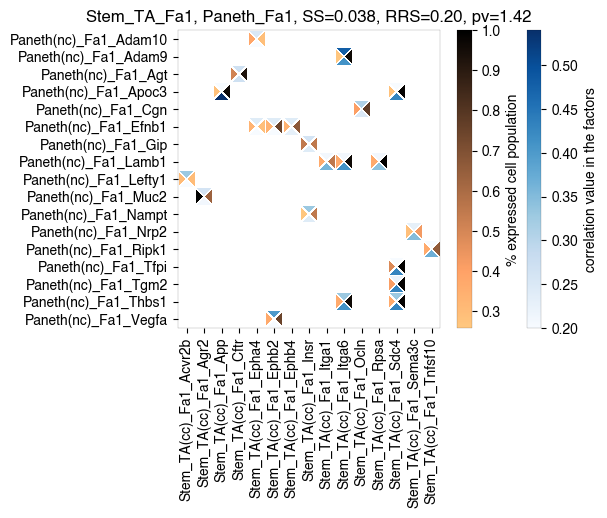

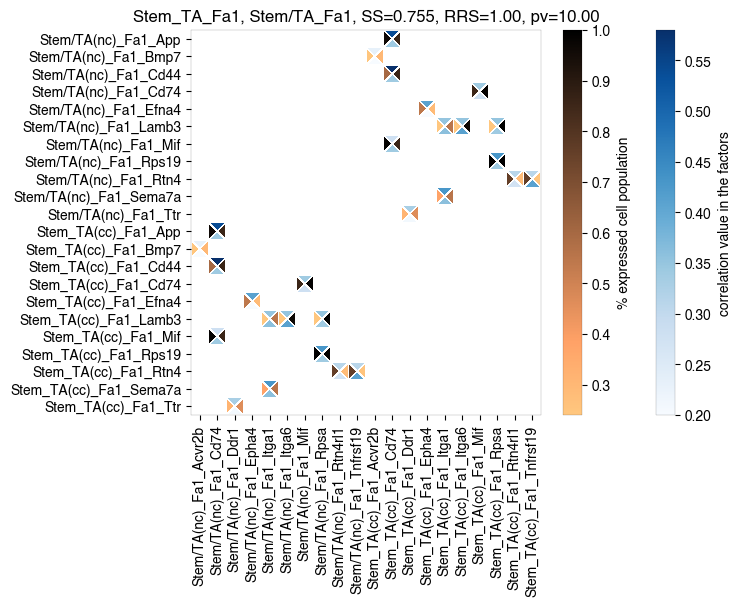

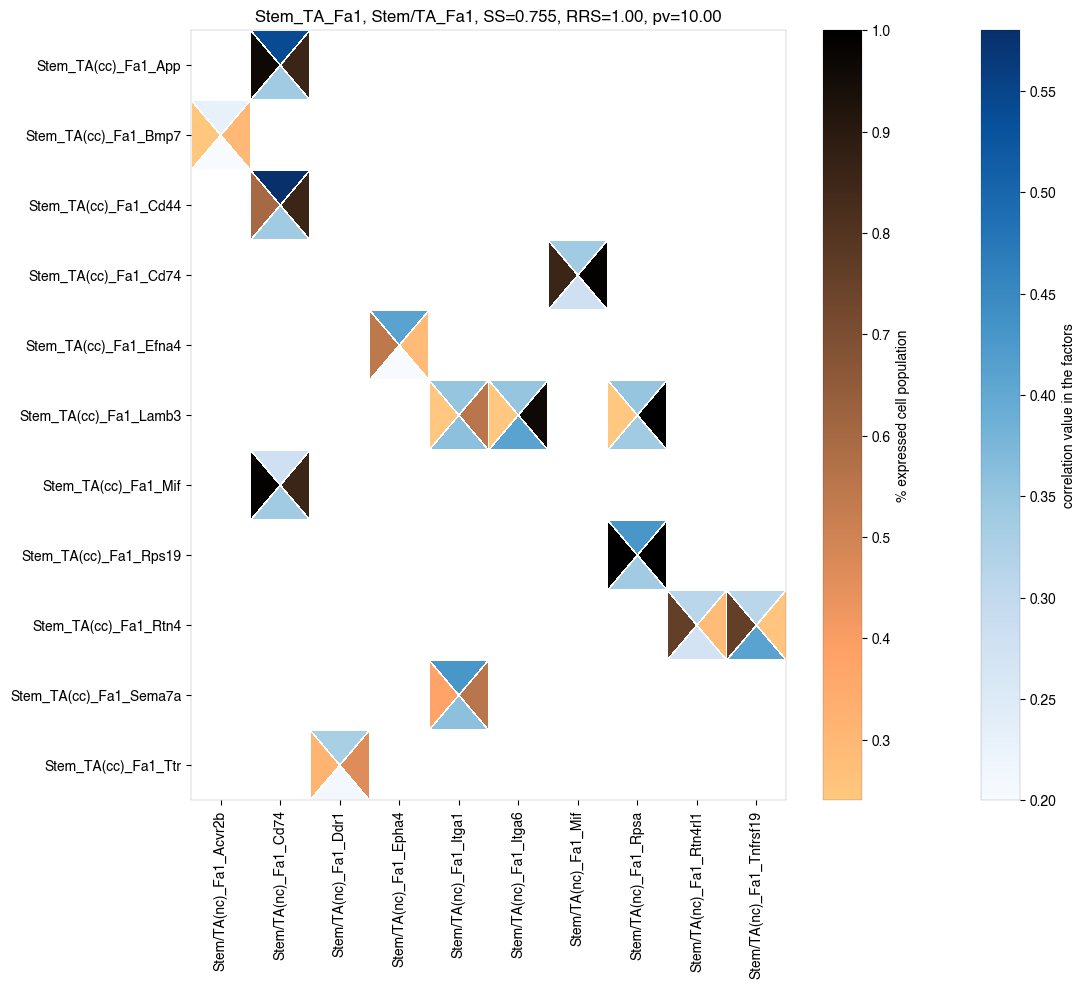

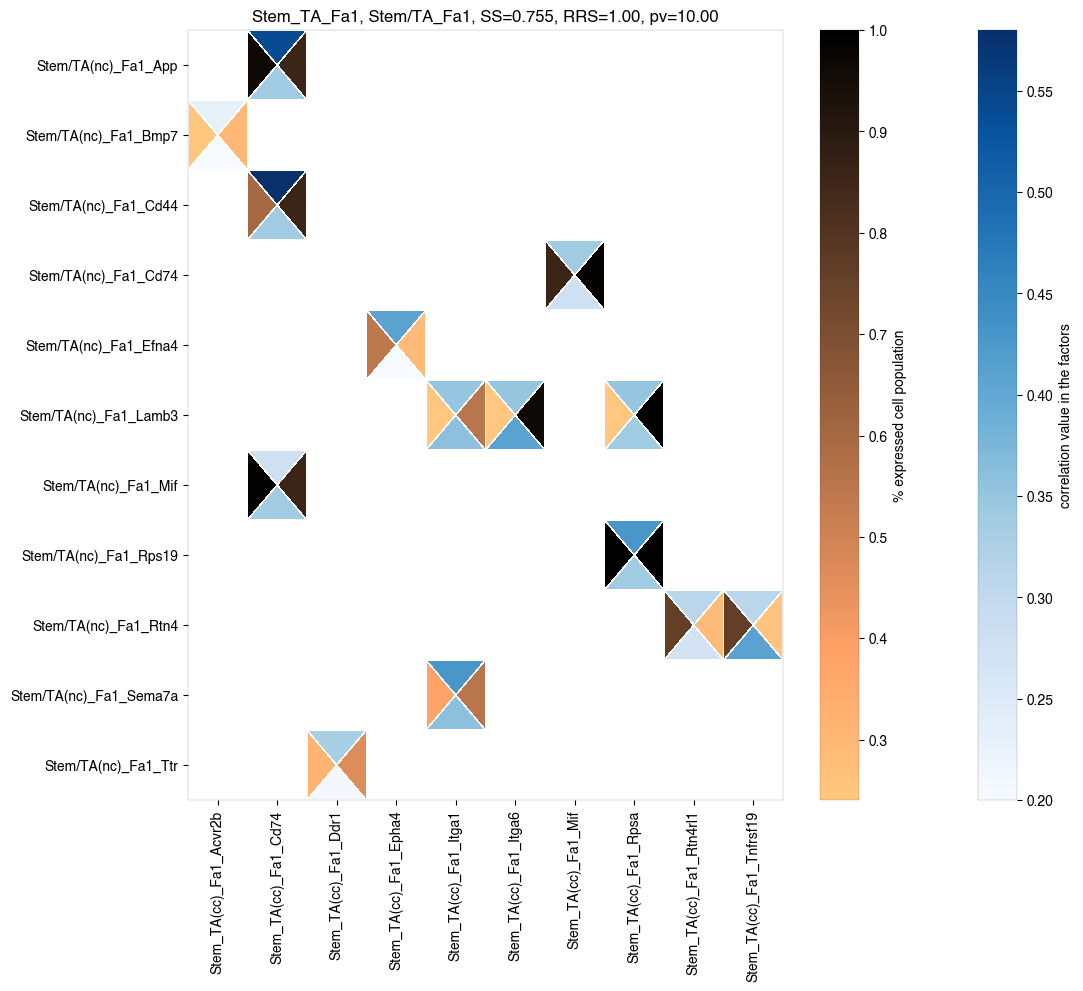

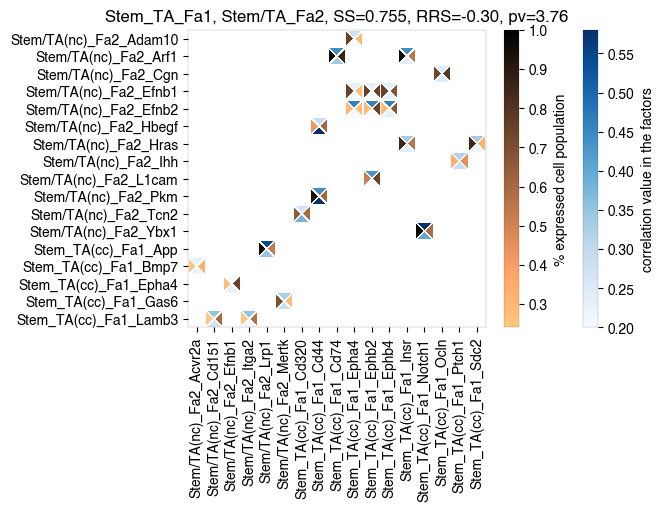

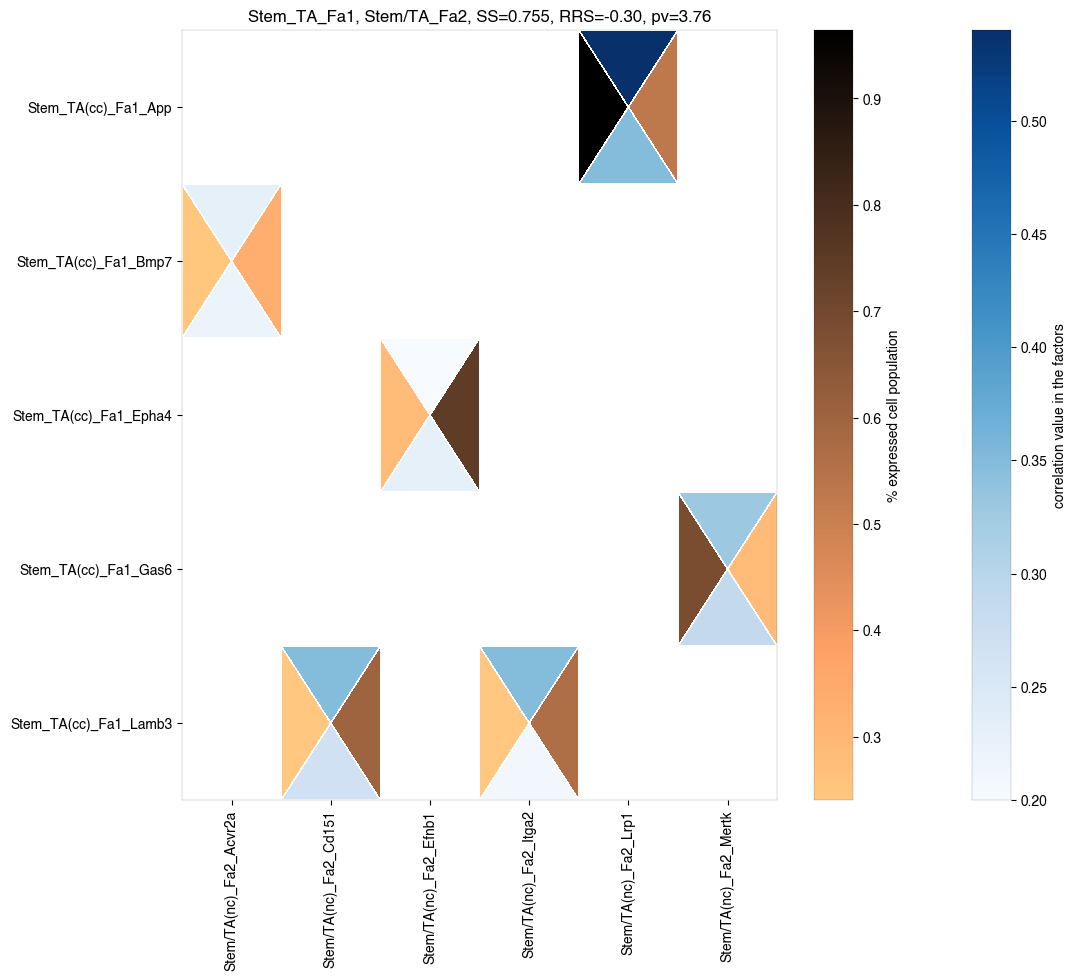

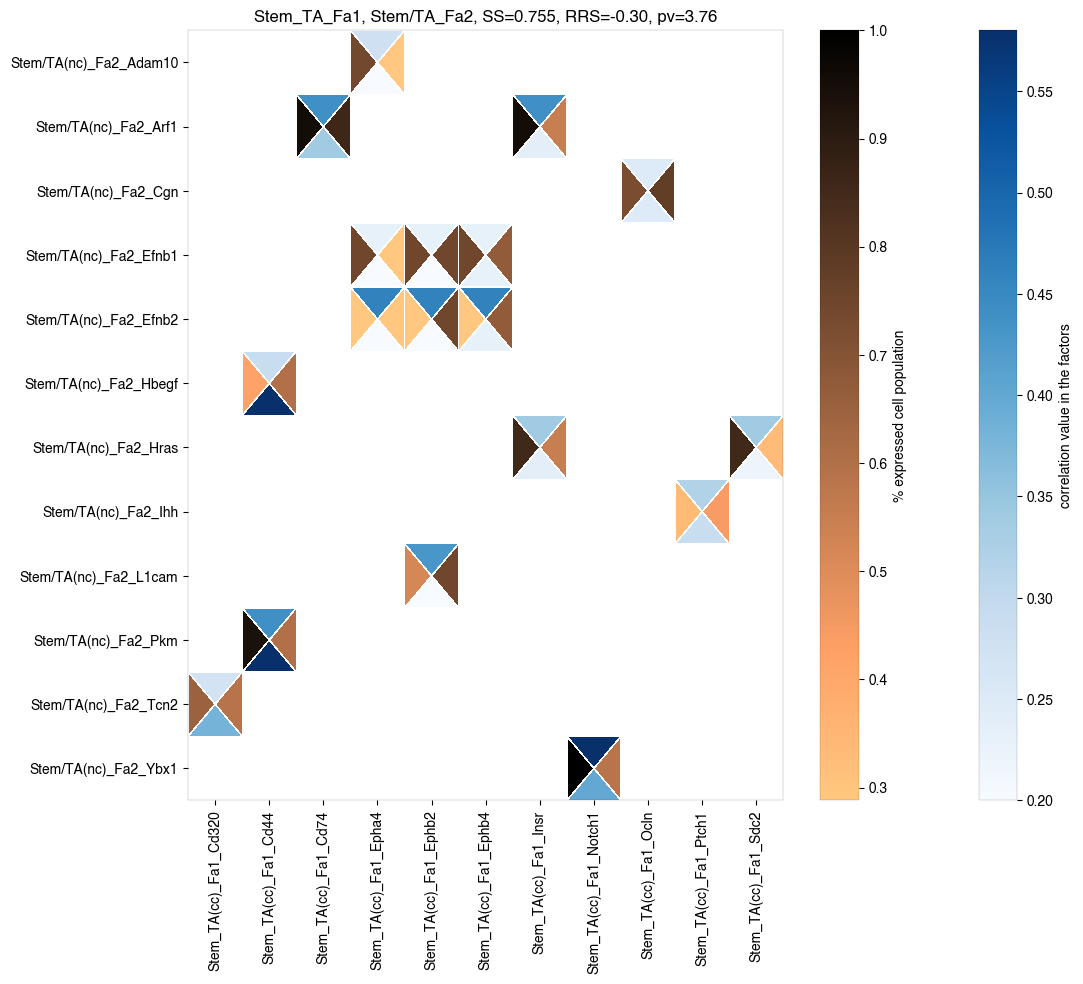

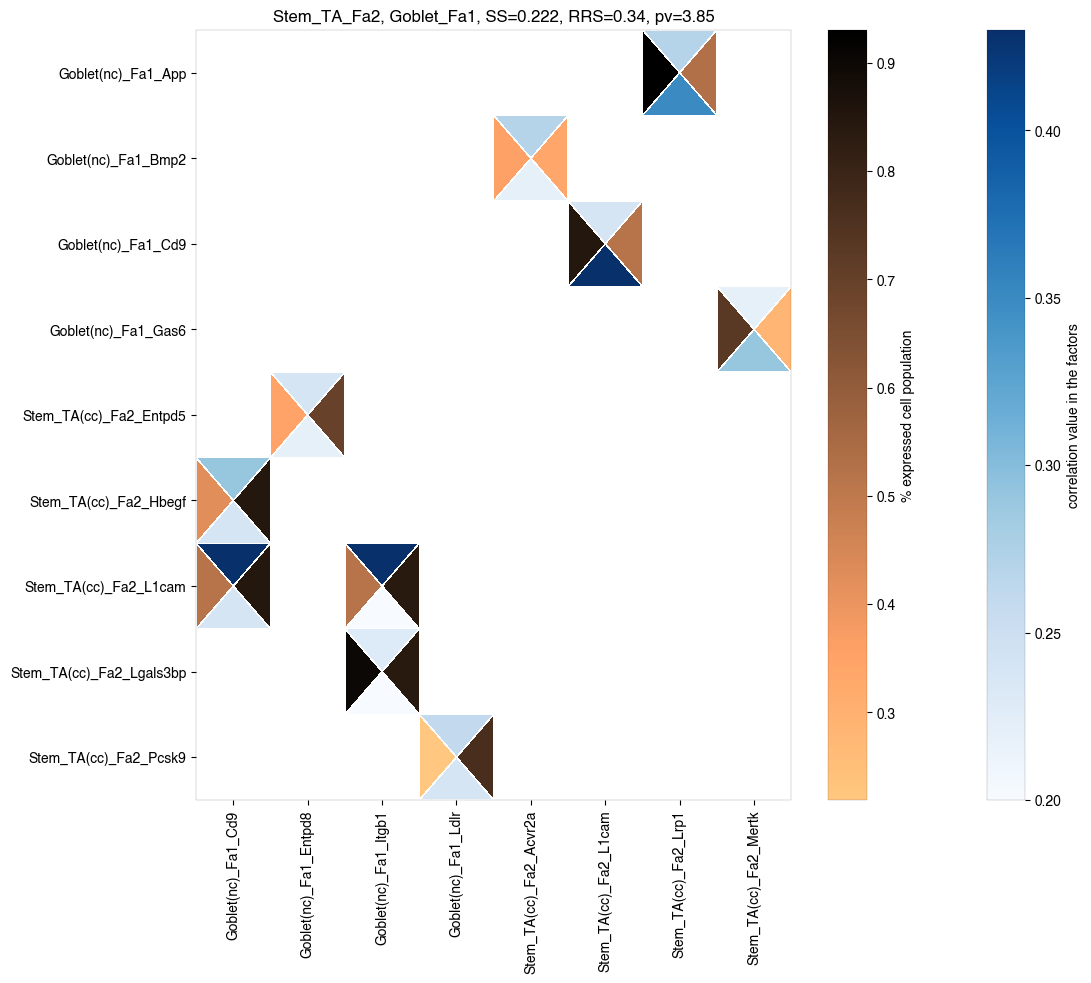

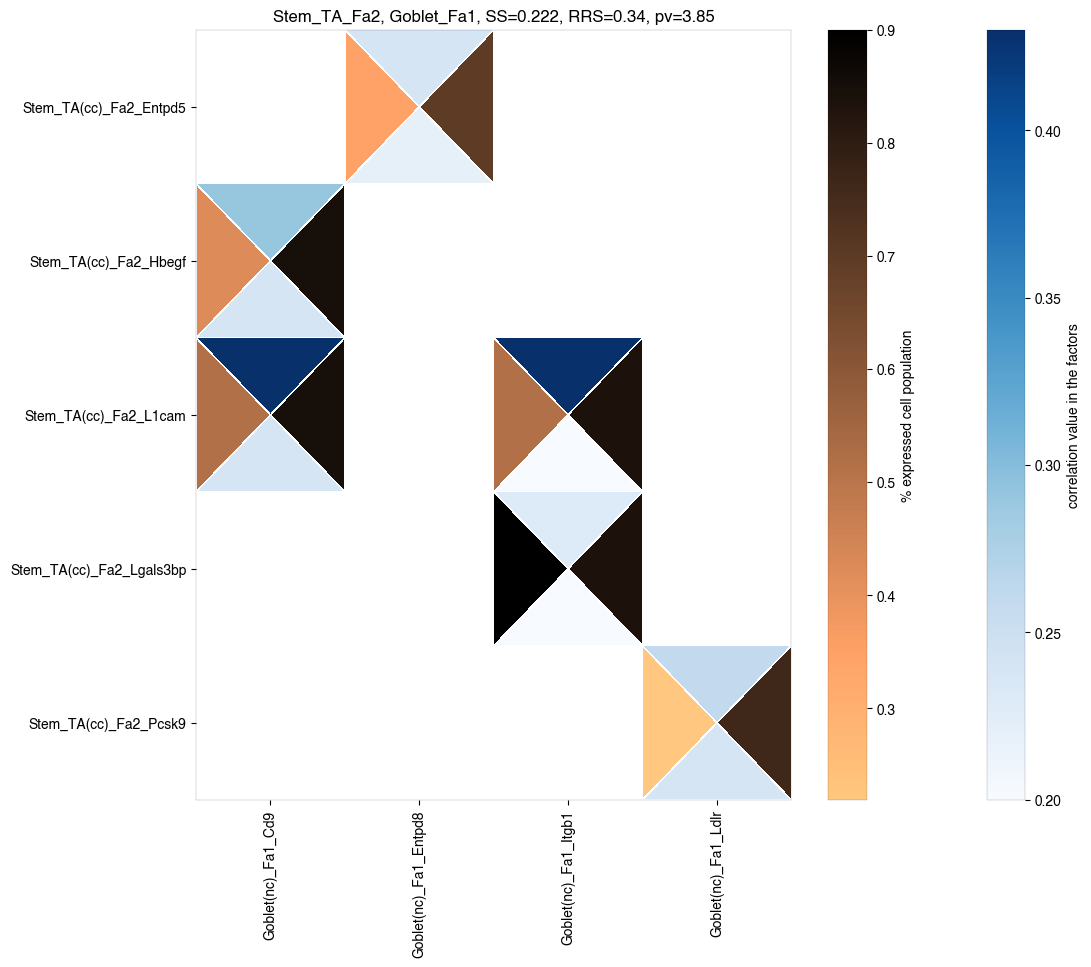

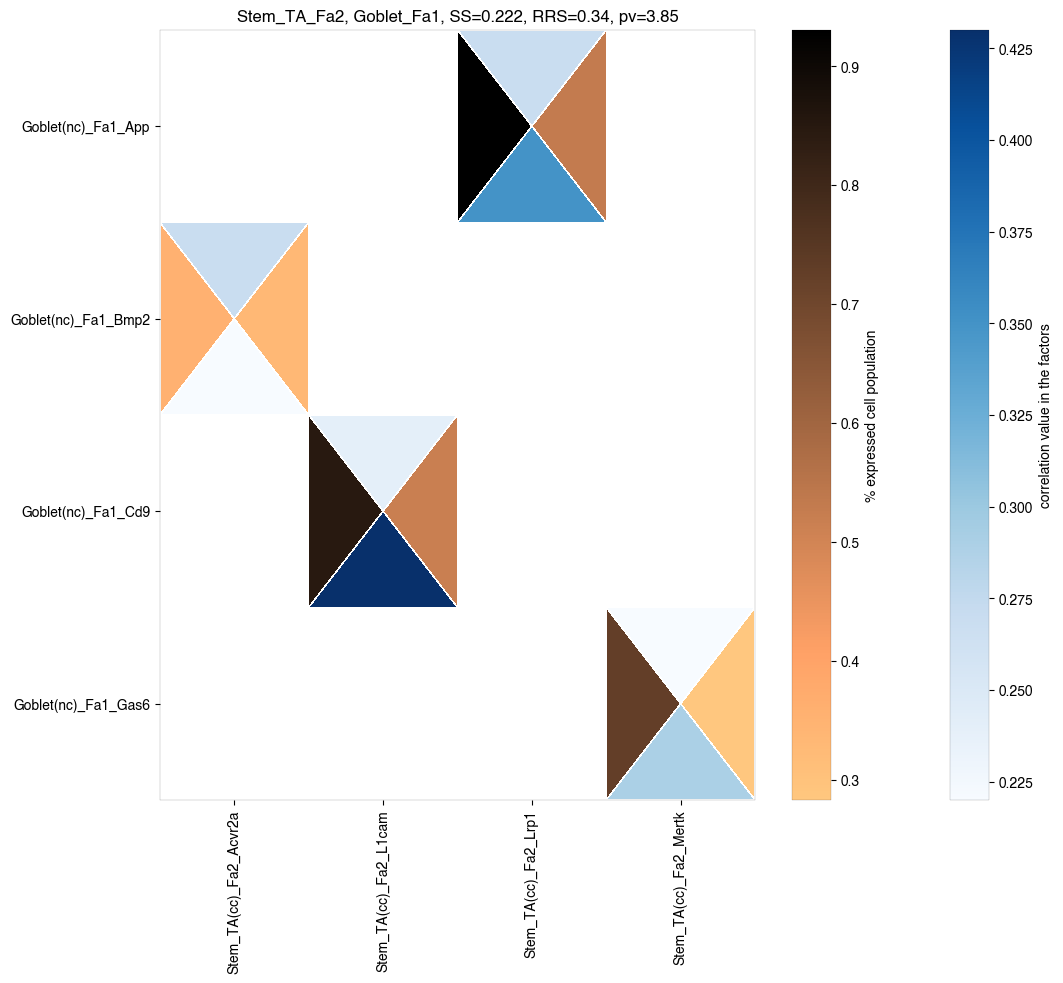

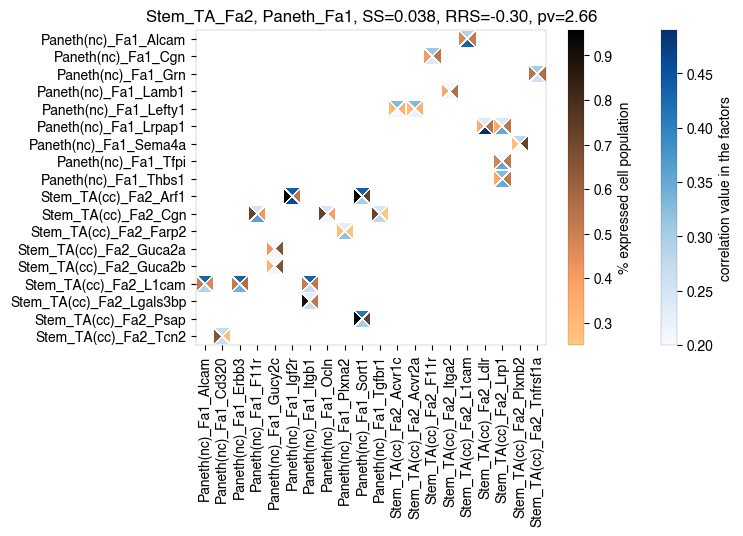

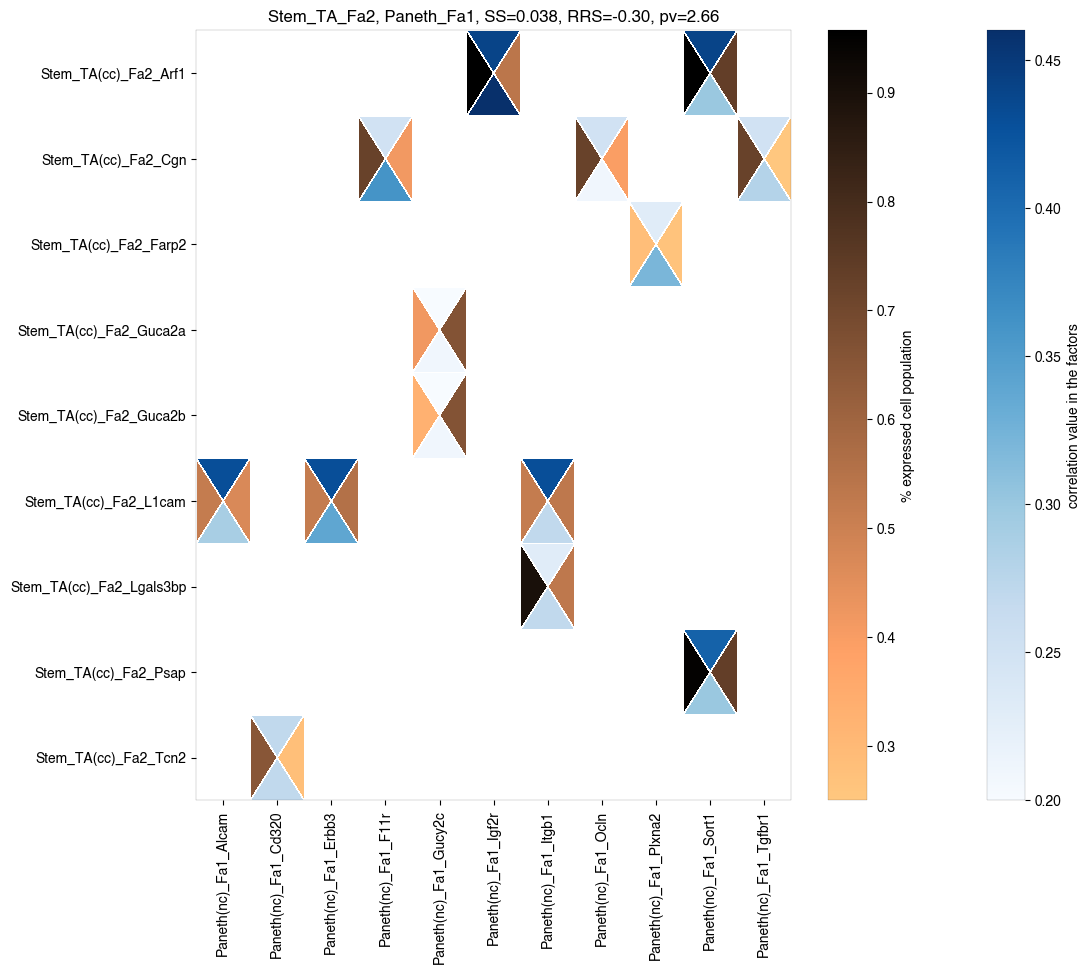

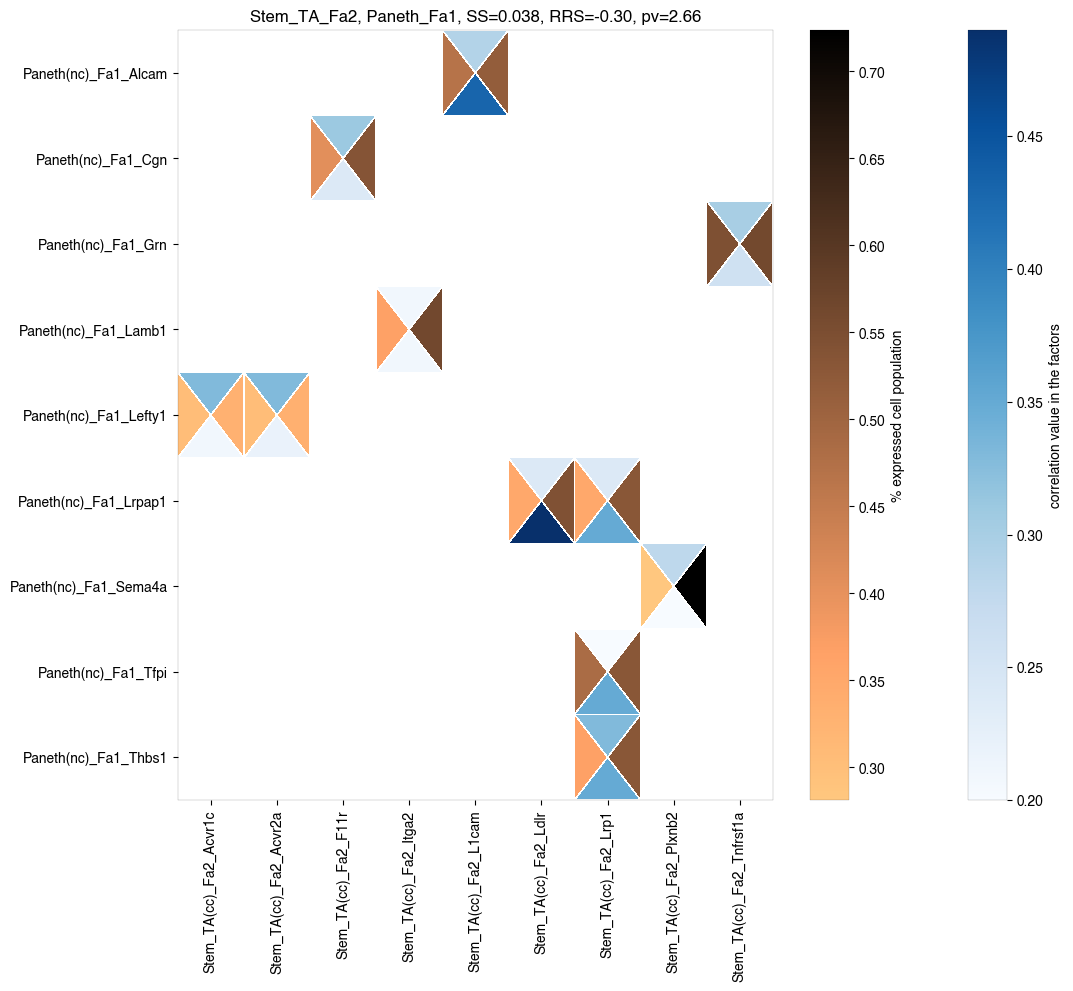

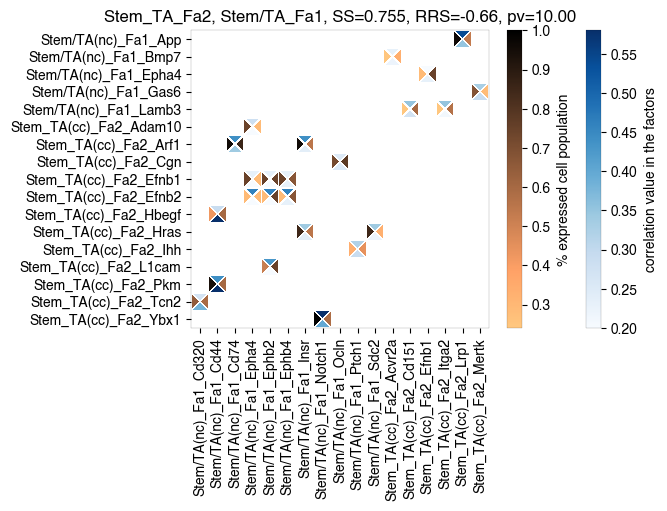

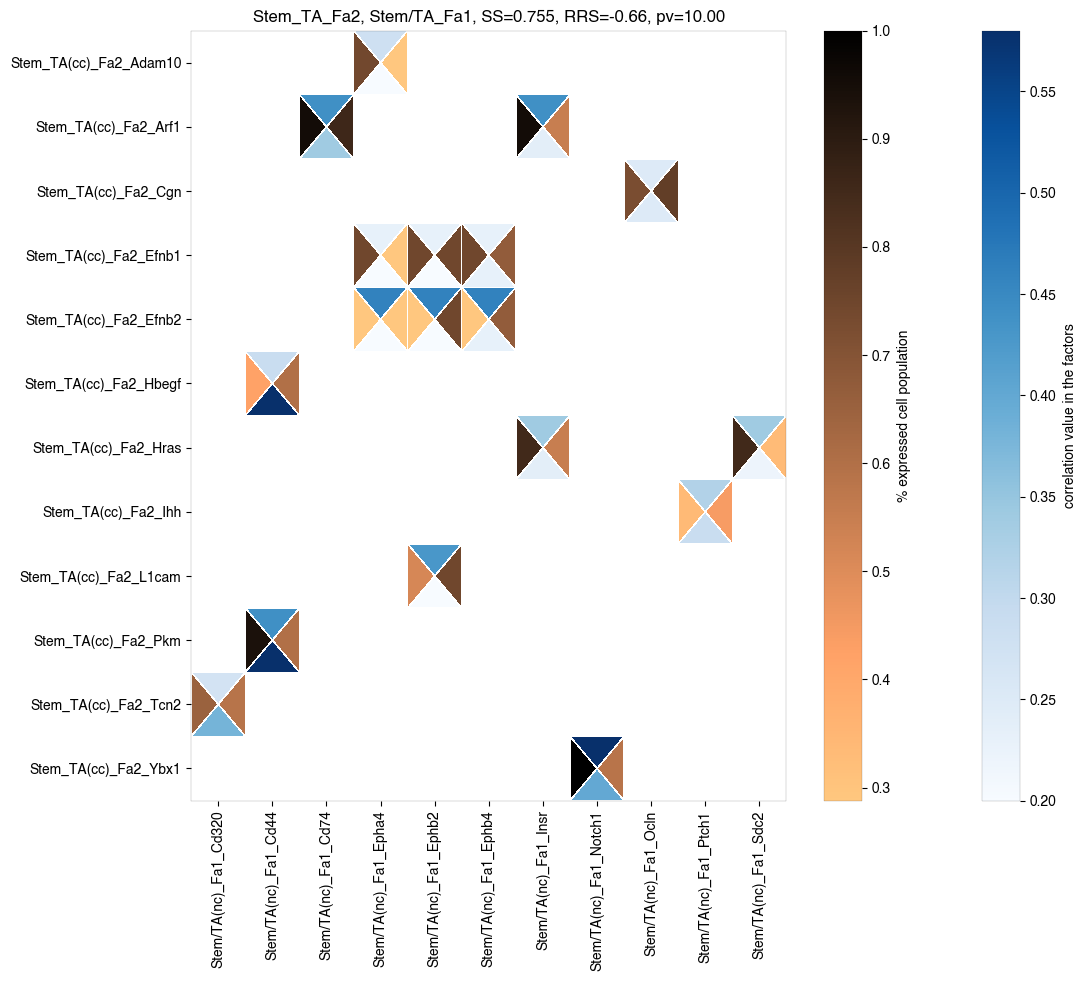

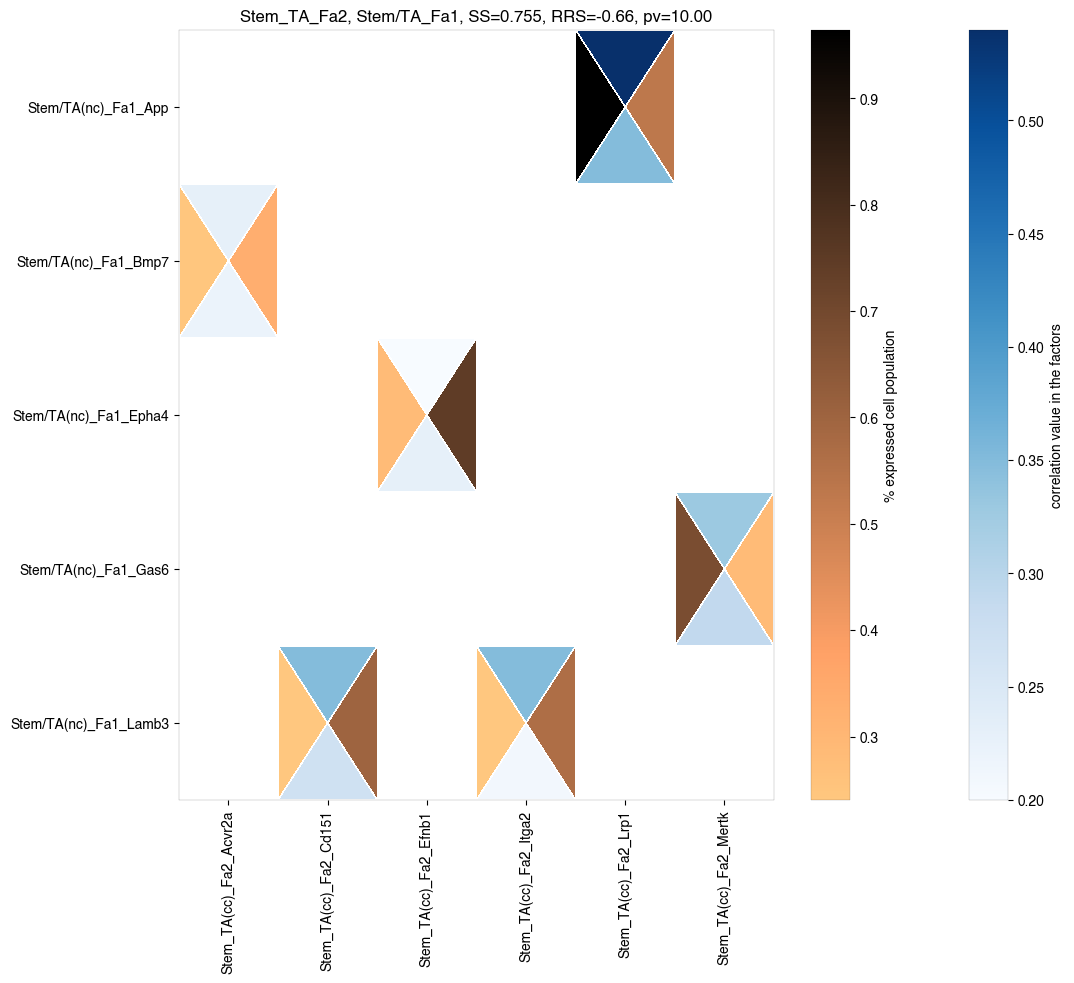

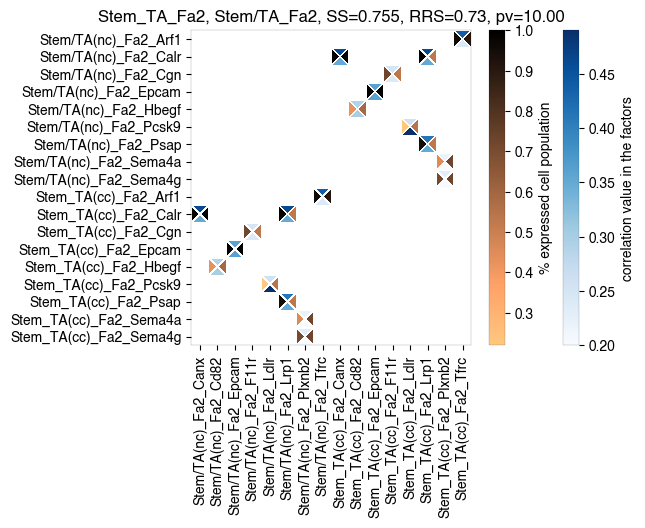

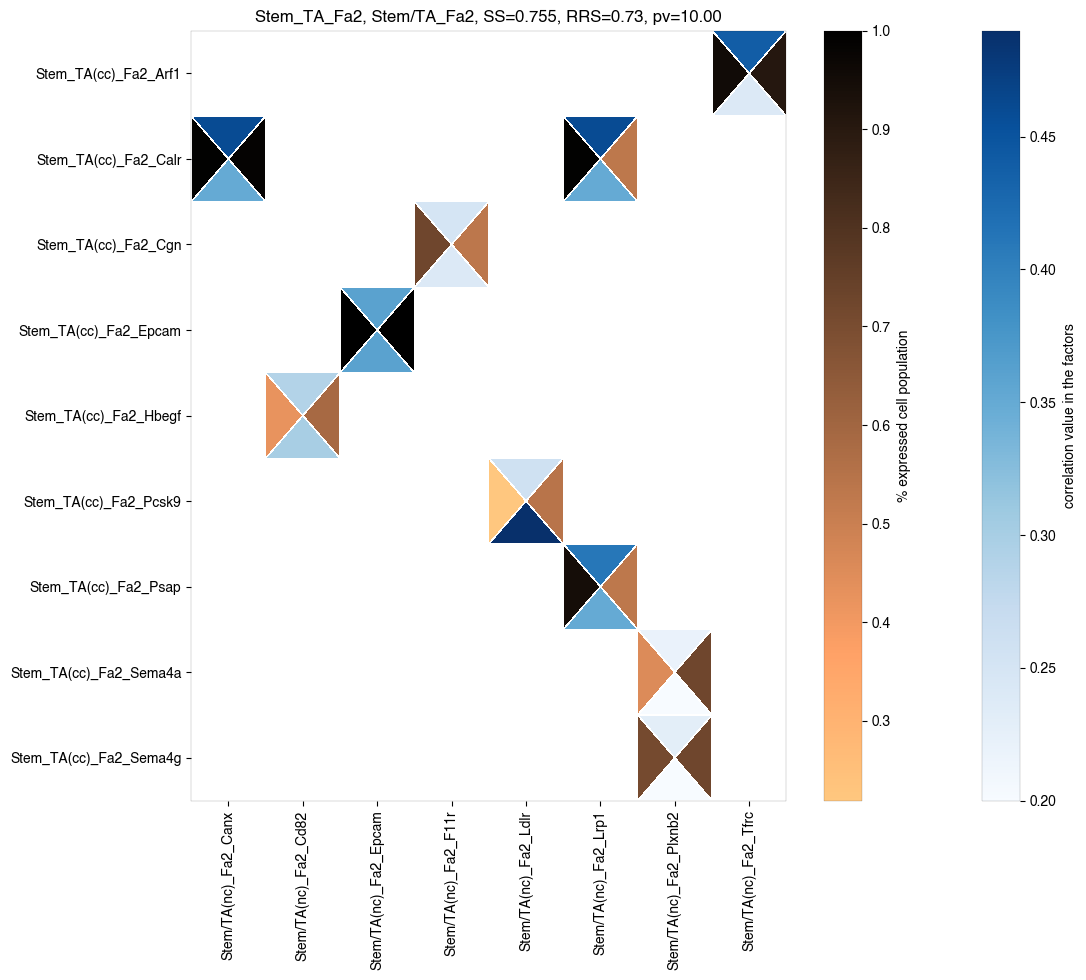

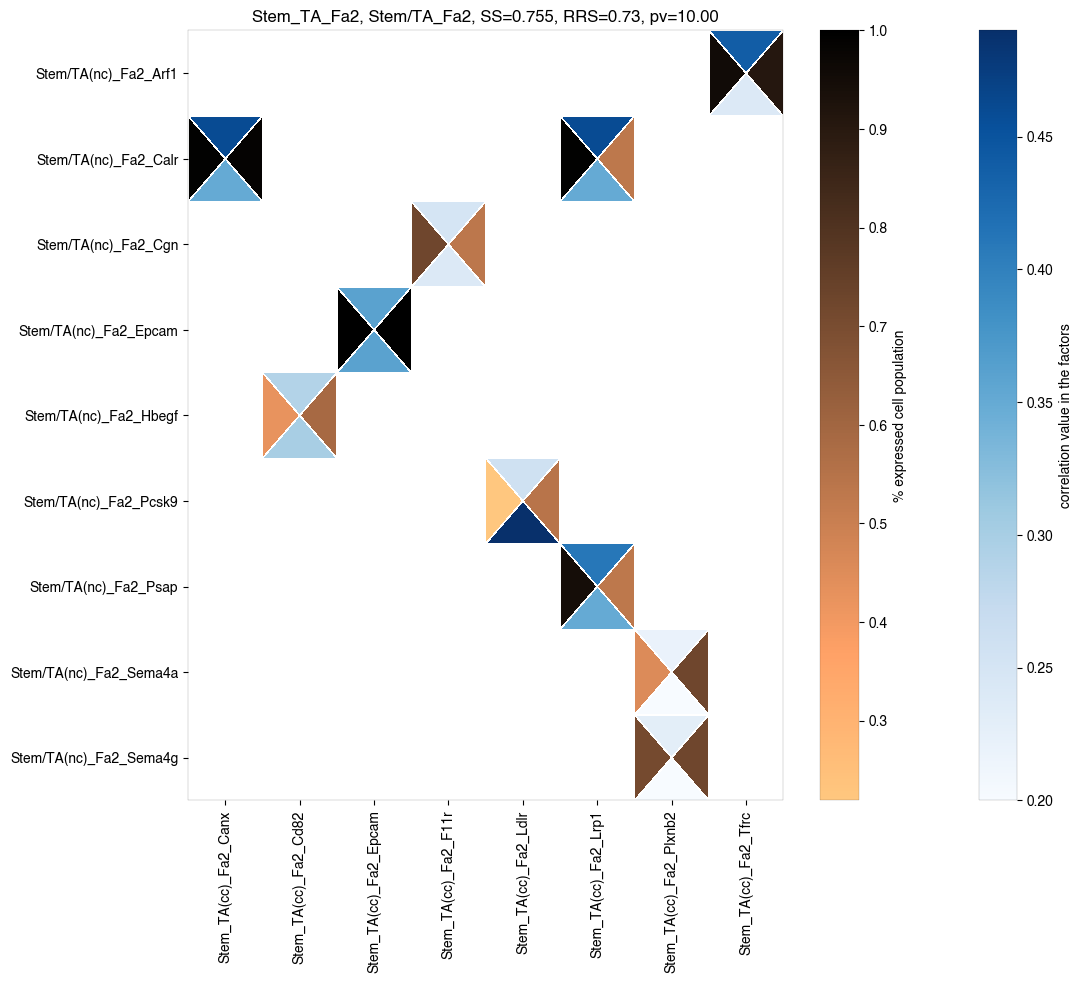

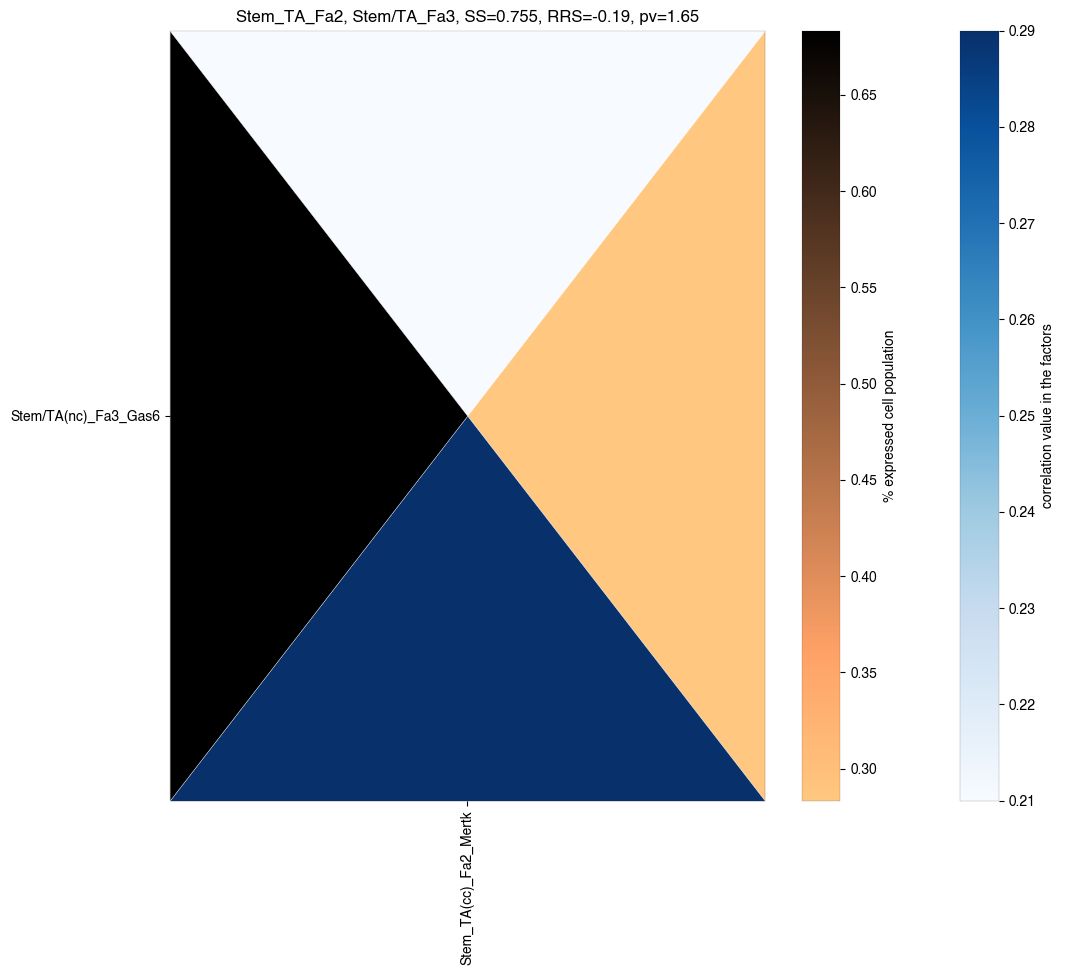

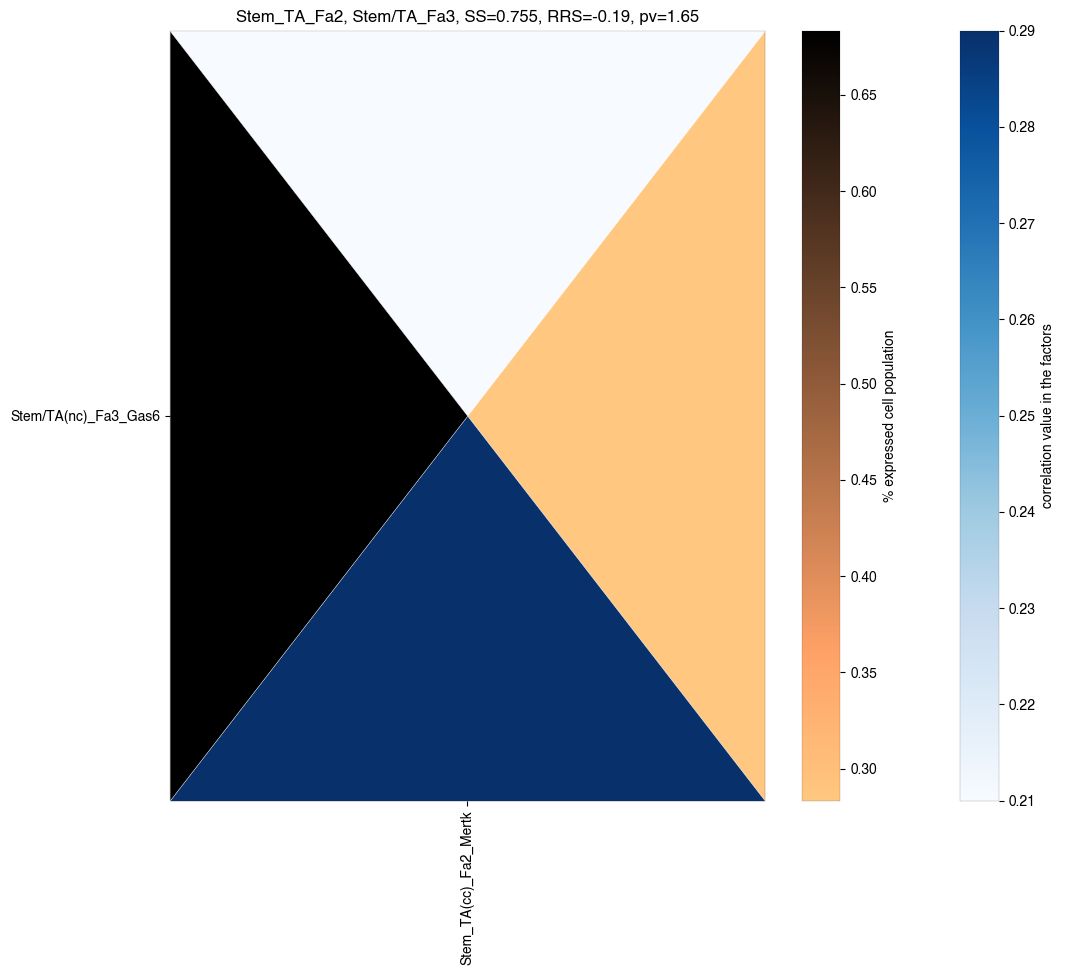

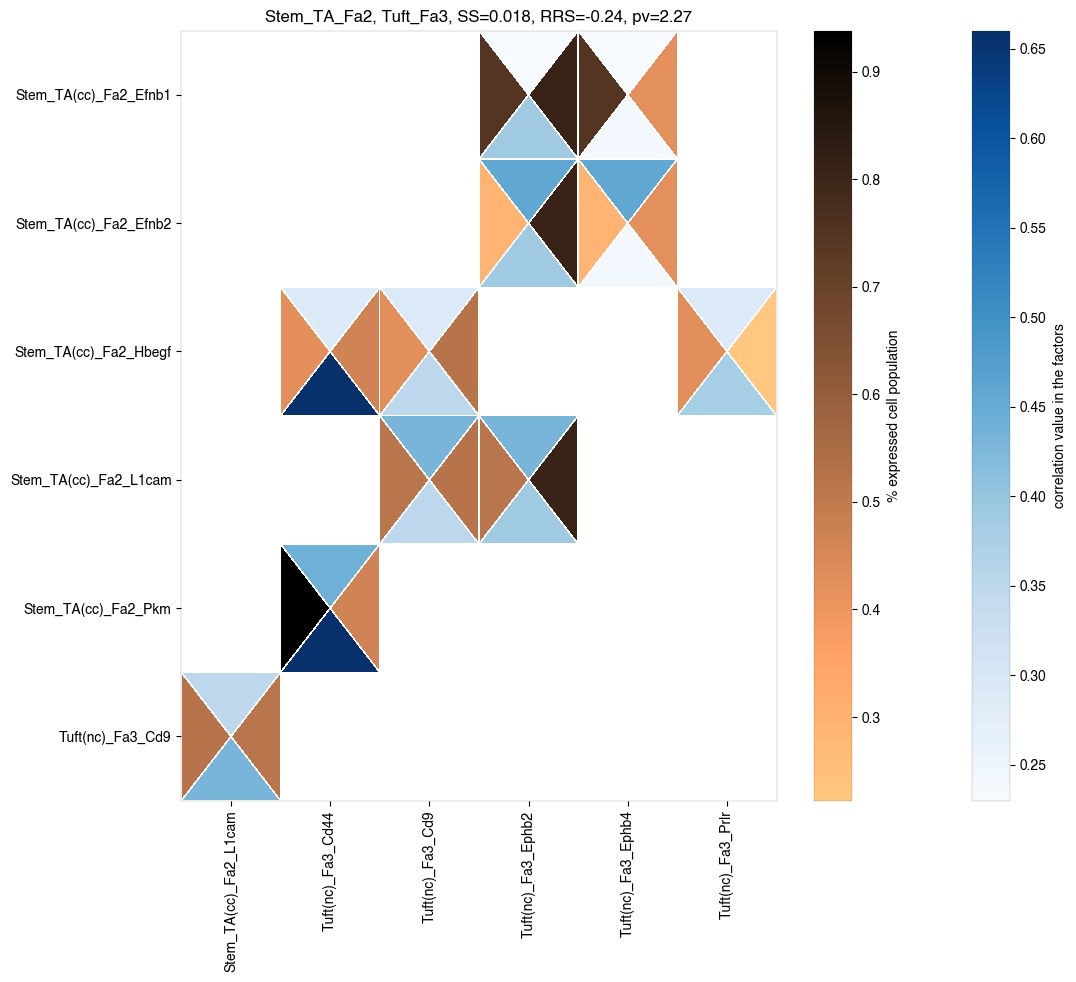

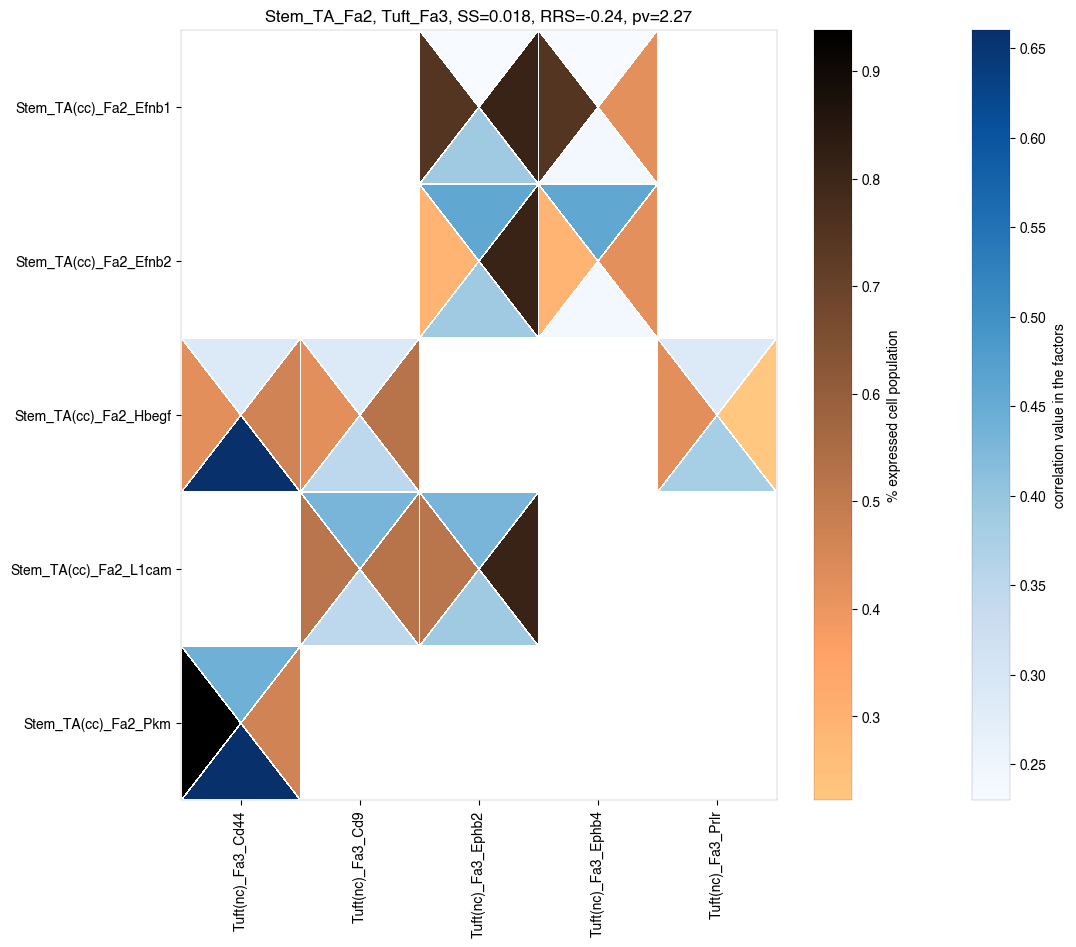

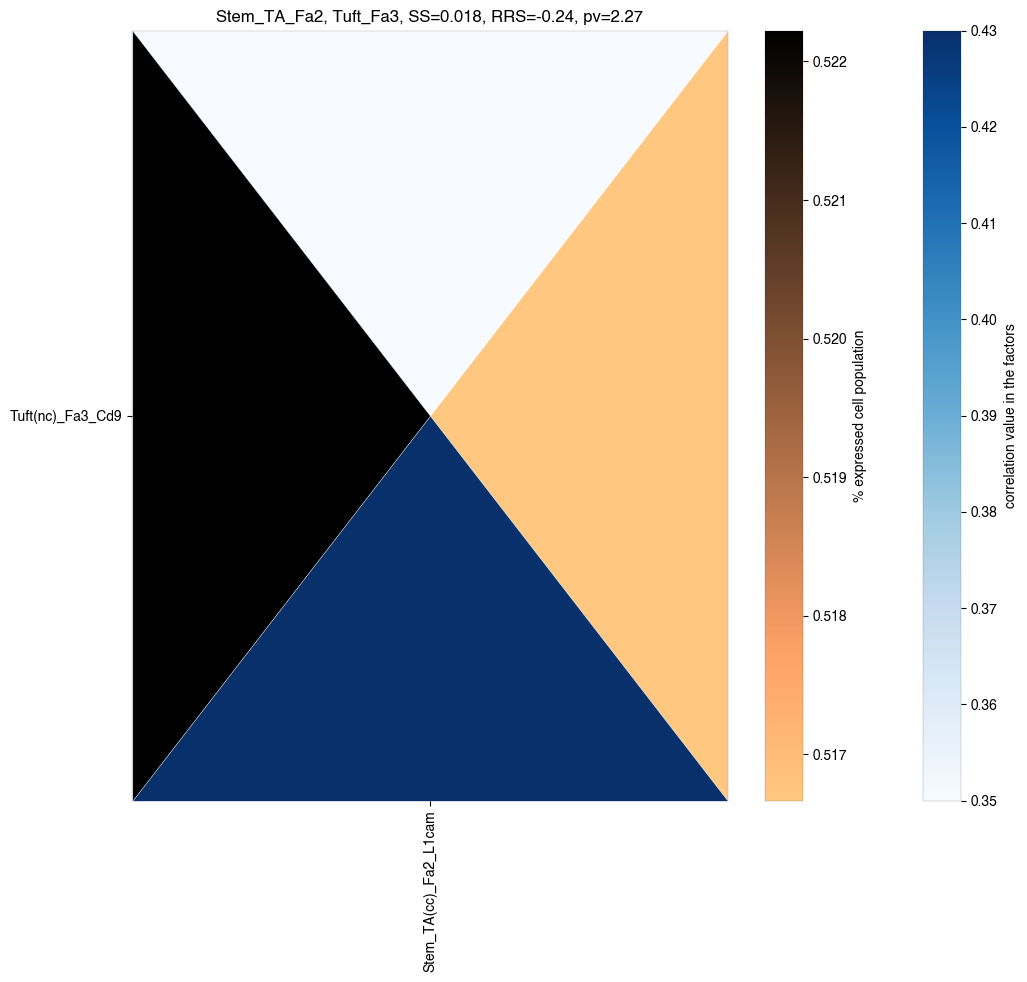

In [23]:
print("Perform ligand receptors analysis Stem/TA niche")
choose_celltypes=['Stem/TA']
scov.find_LR_interactions_in_interacting_cell_types(all_output_data,choose_celltypes=choose_celltypes,
            LR_plot_NMF_Fa_thres=0.2,LR_plot_Exp_thres=0.2)


Perform ligand receptors analysis of Paneth Niche
LR figures for both ways are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3//Plot_ligand_receptor_in_niche/
LR figures for CC to NC are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3//Plot_ligand_receptor_in_niche_cc_vs_nc/
LR figures for NC to CC are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3//Plot_ligand_receptor_in_niche_nc_vs_cc/
cell types found  ['Paneth']


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


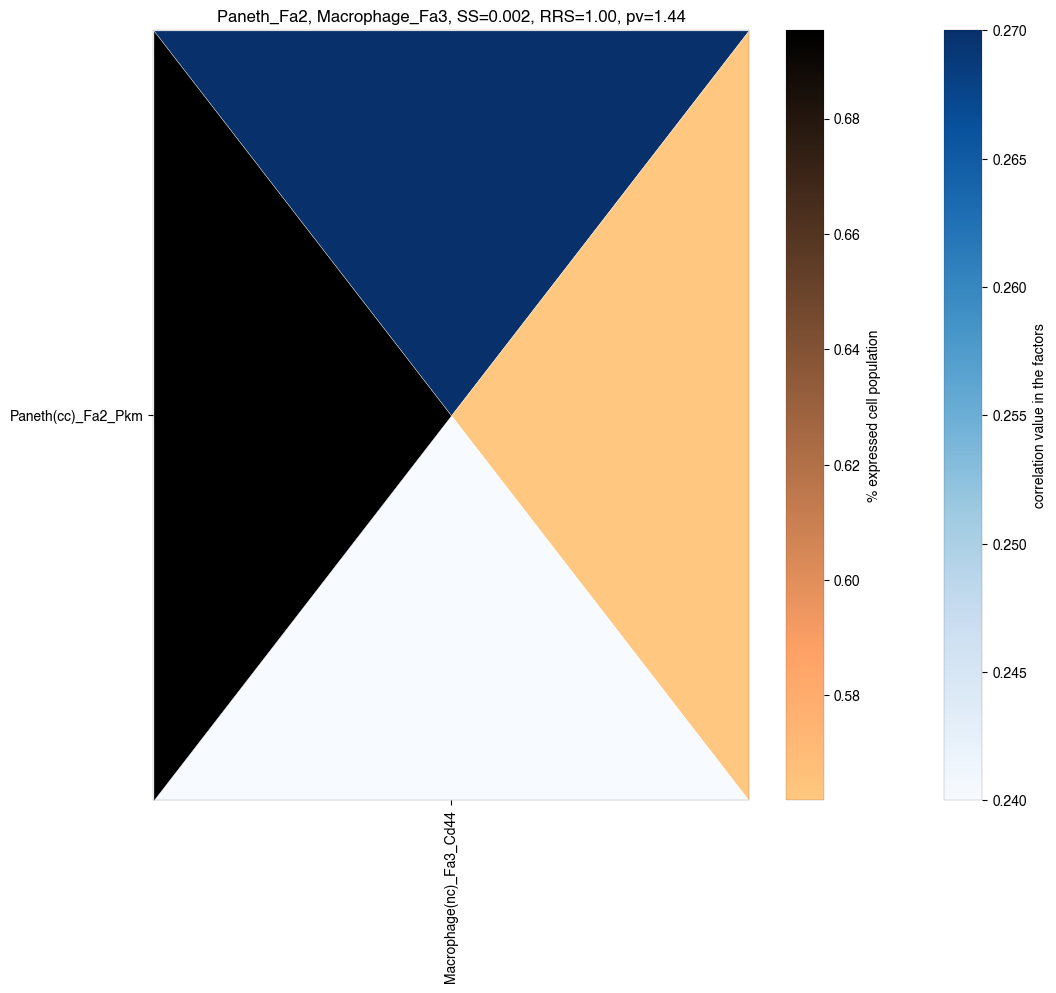

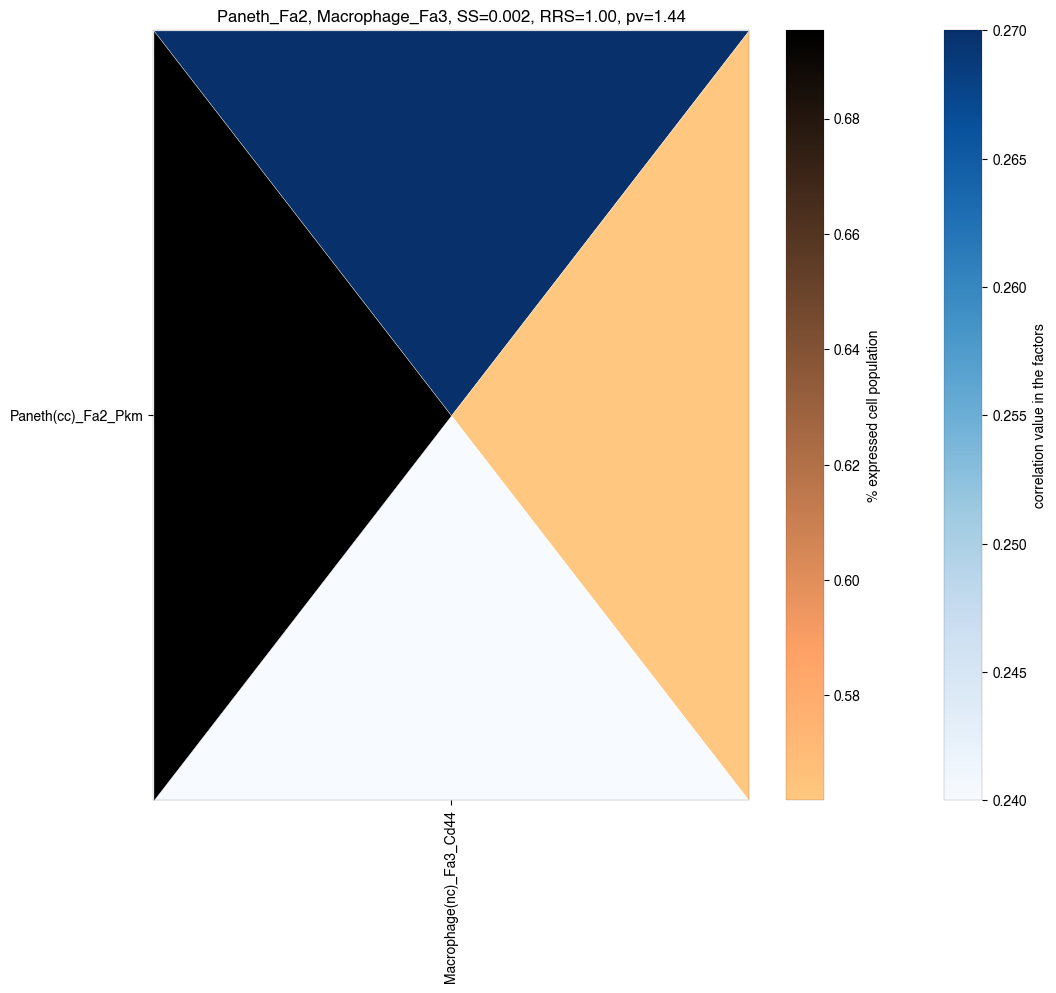

In [24]:
print("Perform ligand receptors analysis of Paneth Niche")
choose_celltypes=['Paneth']
scov.find_LR_interactions_in_interacting_cell_types(all_output_data,choose_celltypes=choose_celltypes,
            LR_plot_NMF_Fa_thres=0.2,LR_plot_Exp_thres=0.2)


Plot feature matrices


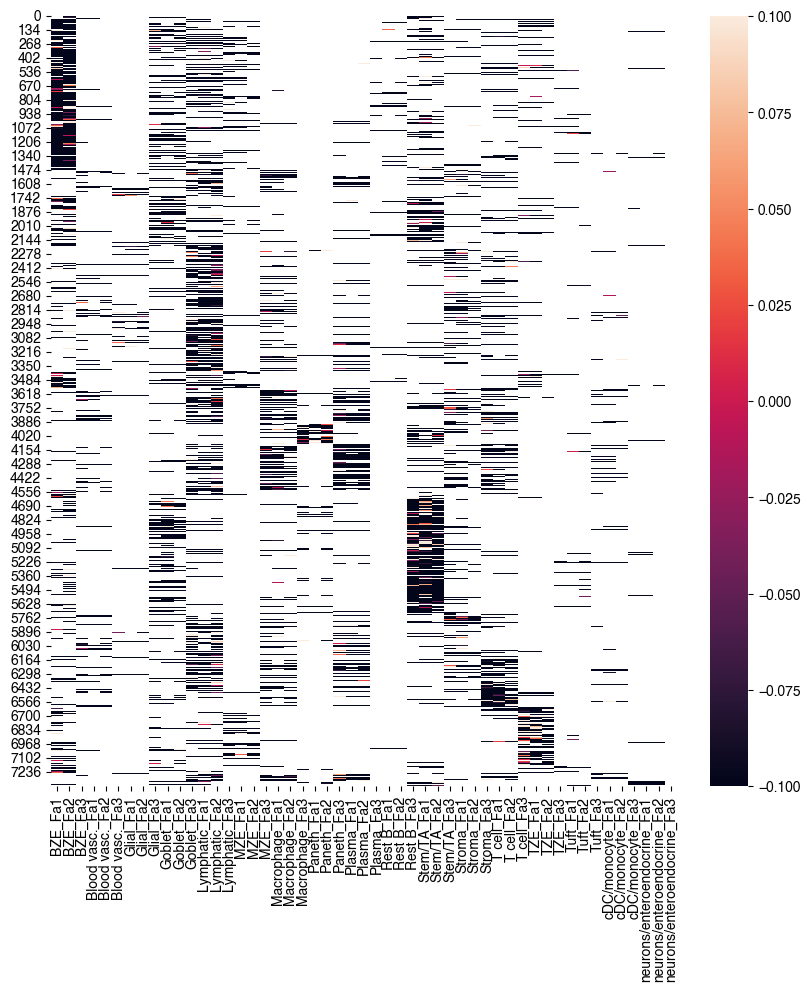

In [25]:
print("Plot feature matrices")
scov.plot_feature_matrices(all_output_data)

In [26]:
print("Make excel sheet for each cell type (gene correlation to spearman and cosine)")
print("save the data of gene spearman and cosine correlation with the factors in the Excel sheet")
scov.make_excel_sheet_for_gene_correlation(all_output_data)

Make excel sheet for each cell type (gene correlation to spearman and cosine)
save the data of gene spearman and cosine correlation with the factors in the Excel sheet


Perform pathway for top correlated genes using the gseapy package
The pathway figures are saved in  ./spatial_ct_ct_interactions/covariations_R0_F3//Pathway_figures/
cell types found  ['Stem/TA']


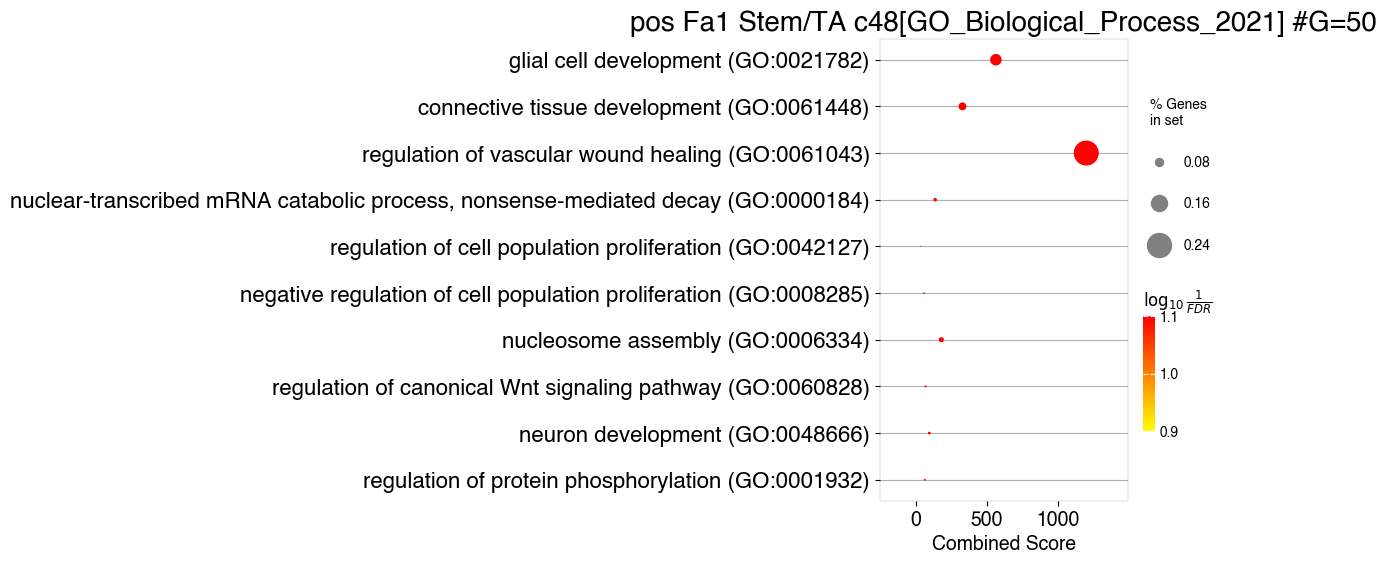

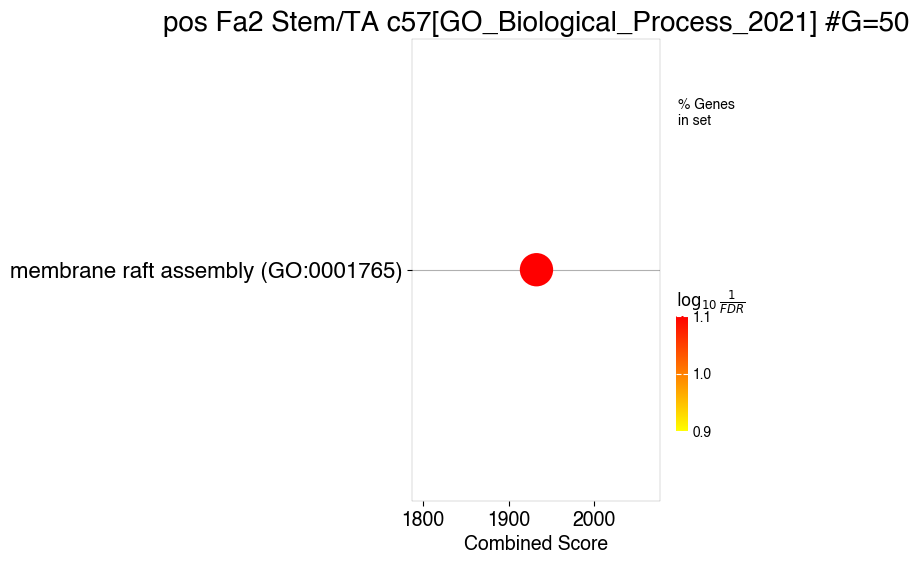

In [27]:
print("Perform pathway for top correlated genes using the gseapy package")
choose_celltypes=['Stem/TA']
scov.pathway_analysis(all_output_data,choose_celltypes=choose_celltypes,NOG_pathway=50,
                      positively_correlated=True,savefigure=False,database=['GO_Biological_Process_2021'])

The pathway figures are saved in  ./spatial_ct_ct_interactions/covariations_R0_F3//Pathway_figures/
cell types found  ['Paneth']


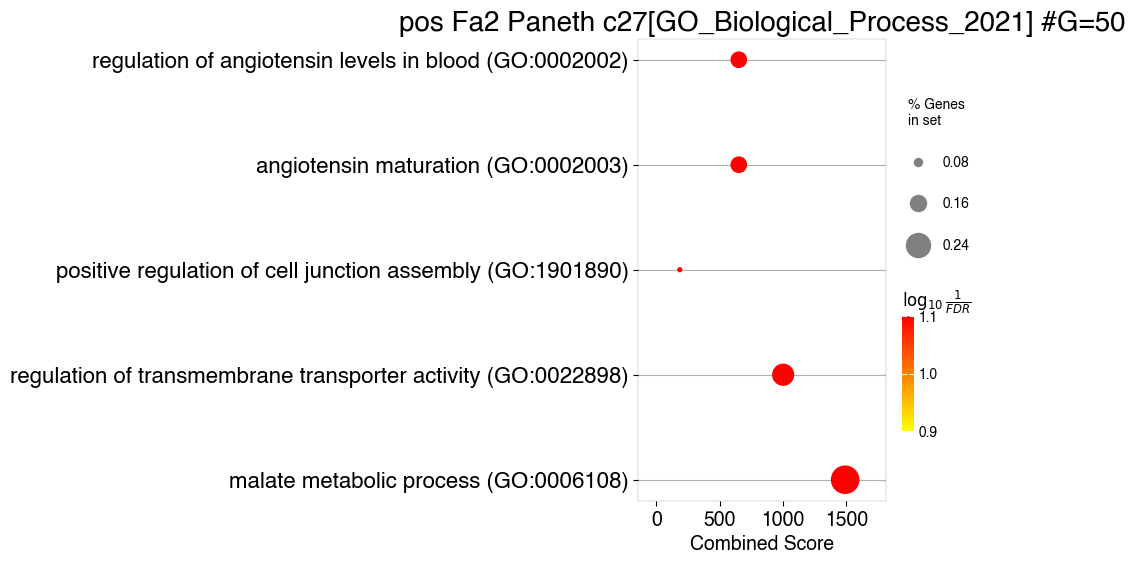

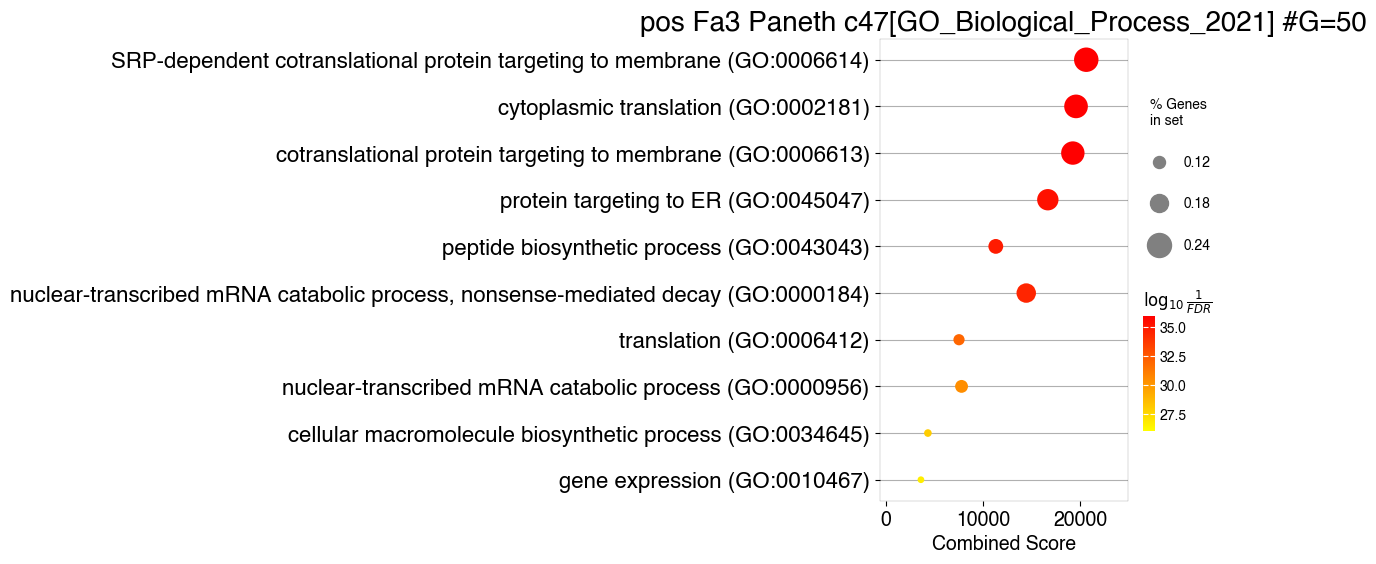

In [28]:
choose_celltypes=['Paneth']
scov.pathway_analysis(all_output_data,choose_celltypes=choose_celltypes,NOG_pathway=50,
                      positively_correlated=True,savefigure=False,database=['GO_Biological_Process_2021'])


In [ ]:
scov.plot_top_selected_genes_as_dotplot(all_output_data,choose_celltypes=['Paneth'])

cell types found  ['Paneth']


cell types found  ['Stem/TA']


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


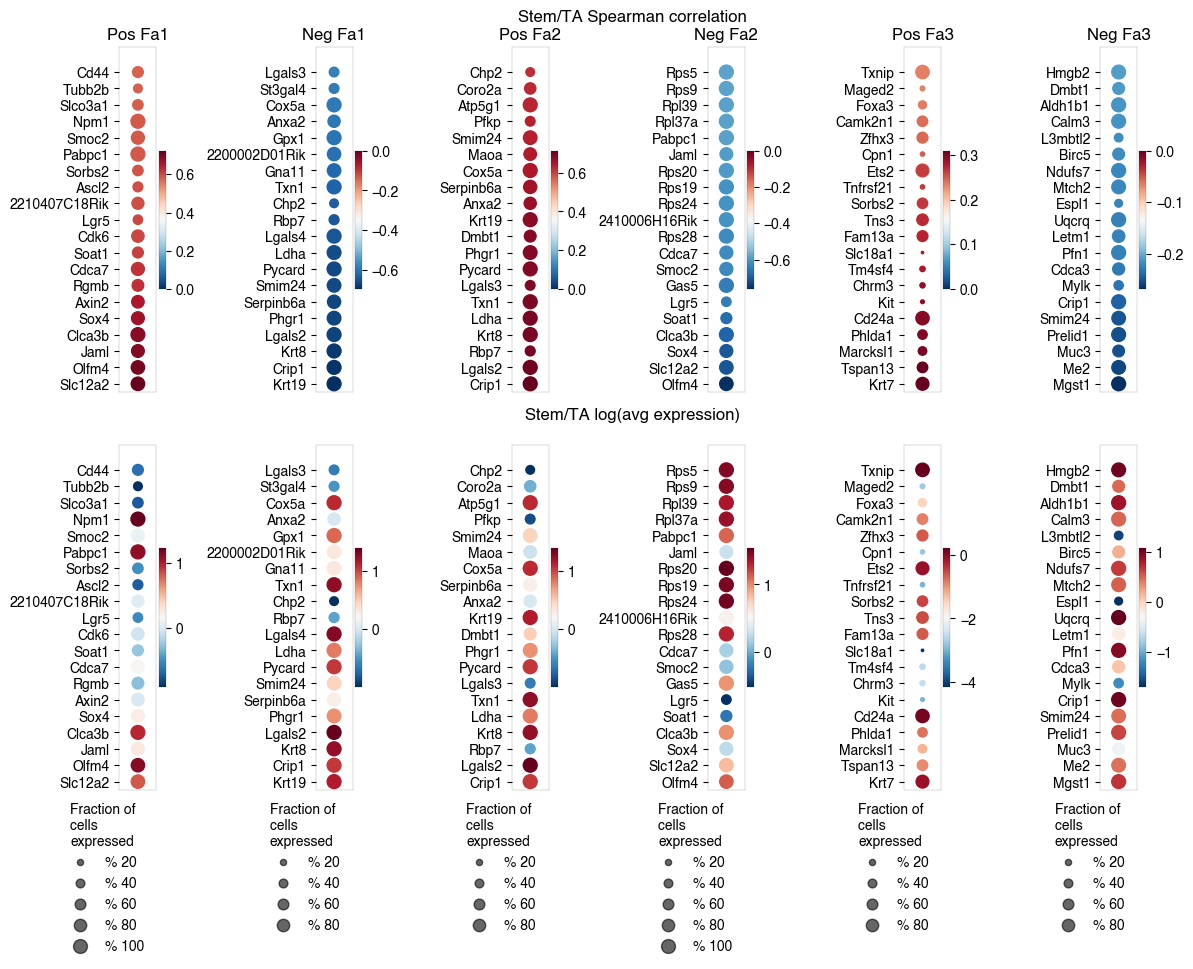

In [6]:
scov.plot_top_selected_genes_as_dotplot(all_output_data,choose_celltypes=['Stem/TA'])

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


0

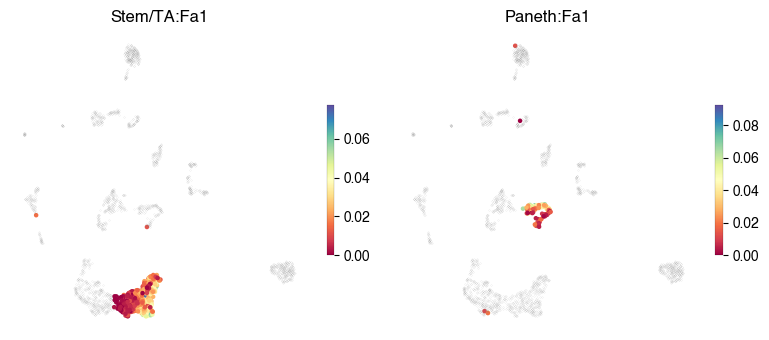

In [22]:
scov.visualize_factors_in_scRNAseq_umap(all_output_data,choose_interacting_celltype_pair=['Stem/TA','Paneth'],visualize_factors_id=[1,1])


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


0

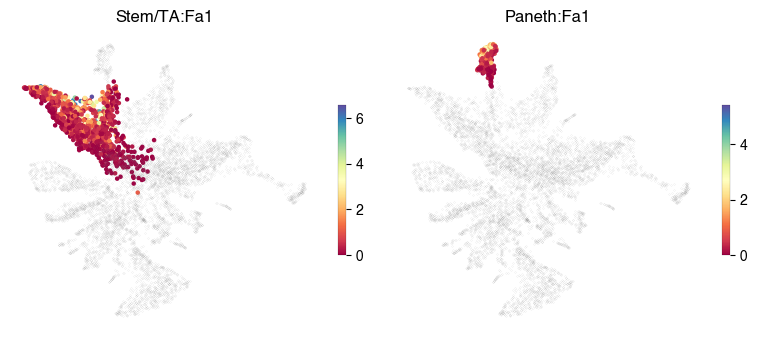

In [23]:
scov.visualize_factors_in_spatial_umap(all_output_data,choose_interacting_celltype_pair=['Stem/TA','Paneth'],visualize_factors_id=[1,1])
